In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RB
#from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE as SM
from sklearn.ensemble import RandomForestRegressor as RF,GradientBoostingRegressor as GB,ExtraTreesClassifier as ET
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neural_network import MLPClassifier as MP
df = pd.DataFrame(data=[1, 2, 3, 4, 5], columns=['A'])
df=pd.read_csv('data.csv')
df.head()

CONS_NO  FLAG  1/1/2014  1/10/2014  1/11/2014  \
0  0387DD8A07E07FDA6271170F86AD9151     1       NaN        NaN        NaN   
1  01D6177B5D4FFE0CABA9EF17DAFC2B84     1       NaN        NaN        NaN   
2  4B75AC4F2D8434CFF62DB64D0BB43103     1       NaN        NaN        NaN   
3  B32AC8CC6D5D805AC053557AB05F5343     1       NaN        NaN        NaN   
4  EDFC78B07BA2908B3395C4EB2304665E     1       2.9       3.42       3.81   

   1/12/2014  1/13/2014  1/14/2014  1/15/2014  1/16/2014  ...  9/28/2016  \
0        NaN        NaN        NaN        NaN        NaN  ...      10.12   
1        NaN        NaN        NaN        NaN        NaN  ...       0.00   
2        NaN        NaN        NaN        NaN        NaN  ...        NaN   
3        NaN        NaN        NaN        NaN        NaN  ...       6.50   
4       4.58       3.56       4.25       3.86       3.53  ...      17.77   

   9/29/2016  9/3/2016  9/30/2016  9/4/2016  9/5/2016  9/6/2016  9/7/2016  \
0       9.96     16.92       7.60     27.22     18.05     26.47     18.75   
1       0.00      0.00       0.00      0.00      0.00      0.00      0.00   
2        NaN       NaN        NaN       NaN       NaN       NaN       NaN   
3       9.99     11.78      18.59     26.80     18.57     14.59     12.82   
4      10.37     15.32      13.51     12.23     14.68     16.35     18.14   

   9/8/2016  9/9/2016  
0     17.84     14.92  
1      0.00      0.00  
2       NaN       NaN  
3     19.37     15.92  
4     18.41     17.31  

[5 rows x 1036 columns]

In [3]:
math.isnan(df.iloc[0][2])

True

In [4]:
l=df.columns
la=['CONS_NO','FLAG']
lb=[]
for i in l:
    if i not in la:
        lb.append(i)
        
import datetime
dates = [datetime.datetime.strptime(ts, "%Y/%m/%d") for ts in lb]
#dates.sort()
fdates = [datetime.datetime.strftime(ts, "%Y/%m/%d") for ts in dates]

fdates.insert(0,"FLAG")
fdates.insert(0,"CONS_NO")

df.columns=fdates
import datetime
dates = [datetime.datetime.strptime(ts, "%Y/%m/%d") for ts in lb]
dates.sort()
sorteddates = [datetime.datetime.strftime(ts, "%Y/%m/%d") for ts in dates]
cols=df.columns.tolist()[0:2]+sorteddates
df=df[cols]
df

ValueError: time data '1/1/2014' does not match format '%Y/%m/%d'

In [5]:
df1=df

In [6]:
l=df["2014/01/01"]
l1=df["2014/01/02"]
l=np.asarray(l).tolist()
l1=np.asarray(l1).tolist()

KeyError: '2014/01/01'

In [7]:
l2=[]
for i in range(len(l)):
    if math.isnan(l[i]):
        if math.isnan(l1[i]):
            l2.append(0)
        else:
            l2.append(l1[i]/2)
    else:
        l2.append(l[i])
df1["2014/01/01"]=l2

TypeError: must be real number, not str

In [8]:
df1.head()

CONS_NO  FLAG  1/1/2014  1/10/2014  1/11/2014  \
0  0387DD8A07E07FDA6271170F86AD9151     1       NaN        NaN        NaN   
1  01D6177B5D4FFE0CABA9EF17DAFC2B84     1       NaN        NaN        NaN   
2  4B75AC4F2D8434CFF62DB64D0BB43103     1       NaN        NaN        NaN   
3  B32AC8CC6D5D805AC053557AB05F5343     1       NaN        NaN        NaN   
4  EDFC78B07BA2908B3395C4EB2304665E     1       2.9       3.42       3.81   

   1/12/2014  1/13/2014  1/14/2014  1/15/2014  1/16/2014  ...  9/28/2016  \
0        NaN        NaN        NaN        NaN        NaN  ...      10.12   
1        NaN        NaN        NaN        NaN        NaN  ...       0.00   
2        NaN        NaN        NaN        NaN        NaN  ...        NaN   
3        NaN        NaN        NaN        NaN        NaN  ...       6.50   
4       4.58       3.56       4.25       3.86       3.53  ...      17.77   

   9/29/2016  9/3/2016  9/30/2016  9/4/2016  9/5/2016  9/6/2016  9/7/2016  \
0       9.96     16.92       7.60     27.22     18.05     26.47     18.75   
1       0.00      0.00       0.00      0.00      0.00      0.00      0.00   
2        NaN       NaN        NaN       NaN       NaN       NaN       NaN   
3       9.99     11.78      18.59     26.80     18.57     14.59     12.82   
4      10.37     15.32      13.51     12.23     14.68     16.35     18.14   

   9/8/2016  9/9/2016  
0     17.84     14.92  
1      0.00      0.00  
2       NaN       NaN  
3     19.37     15.92  
4     18.41     17.31  

[5 rows x 1036 columns]

In [9]:
df.columns[-1],df.columns[-2]

('9/9/2016', '9/8/2016')

In [10]:
df.iloc[0][1035]

14.92

In [11]:
l=df["2016/10/31"]
l1=df["2016/10/30"]
l=np.asarray(l).tolist()
l1=np.asarray(l1).tolist()

KeyError: '2016/10/31'

In [12]:
l2=[]
for i in range(len(l)):
    if math.isnan(l[i]):
        if math.isnan(l1[i]):
            l2.append(0)
        else:
            l2.append(l1[i]/2)
    else:
        l2.append(l[i])
df1["2016/10/31"]=l2

TypeError: must be real number, not str

In [13]:
df1.head()

CONS_NO  FLAG  1/1/2014  1/10/2014  1/11/2014  \
0  0387DD8A07E07FDA6271170F86AD9151     1       NaN        NaN        NaN   
1  01D6177B5D4FFE0CABA9EF17DAFC2B84     1       NaN        NaN        NaN   
2  4B75AC4F2D8434CFF62DB64D0BB43103     1       NaN        NaN        NaN   
3  B32AC8CC6D5D805AC053557AB05F5343     1       NaN        NaN        NaN   
4  EDFC78B07BA2908B3395C4EB2304665E     1       2.9       3.42       3.81   

   1/12/2014  1/13/2014  1/14/2014  1/15/2014  1/16/2014  ...  9/28/2016  \
0        NaN        NaN        NaN        NaN        NaN  ...      10.12   
1        NaN        NaN        NaN        NaN        NaN  ...       0.00   
2        NaN        NaN        NaN        NaN        NaN  ...        NaN   
3        NaN        NaN        NaN        NaN        NaN  ...       6.50   
4       4.58       3.56       4.25       3.86       3.53  ...      17.77   

   9/29/2016  9/3/2016  9/30/2016  9/4/2016  9/5/2016  9/6/2016  9/7/2016  \
0       9.96     16.92       7.60     27.22     18.05     26.47     18.75   
1       0.00      0.00       0.00      0.00      0.00      0.00      0.00   
2        NaN       NaN        NaN       NaN       NaN       NaN       NaN   
3       9.99     11.78      18.59     26.80     18.57     14.59     12.82   
4      10.37     15.32      13.51     12.23     14.68     16.35     18.14   

   9/8/2016  9/9/2016  
0     17.84     14.92  
1      0.00      0.00  
2       NaN       NaN  
3     19.37     15.92  
4     18.41     17.31  

[5 rows x 1036 columns]

In [14]:
df.columns

Index(['CONS_NO', 'FLAG', '1/1/2014', '1/10/2014', '1/11/2014', '1/12/2014',
       '1/13/2014', '1/14/2014', '1/15/2014', '1/16/2014',
       ...
       '9/28/2016', '9/29/2016', '9/3/2016', '9/30/2016', '9/4/2016',
       '9/5/2016', '9/6/2016', '9/7/2016', '9/8/2016', '9/9/2016'],
      dtype='object', length=1036)

In [15]:
l=df.columns
la=['CONS_NO','FLAG']
lbx=[]
for i in l:
    if i not in la:
        lbx.append(i)

In [16]:
lb

['1/1/2014',
 '1/10/2014',
 '1/11/2014',
 '1/12/2014',
 '1/13/2014',
 '1/14/2014',
 '1/15/2014',
 '1/16/2014',
 '1/17/2014',
 '1/18/2014',
 '1/19/2014',
 '1/2/2014',
 '1/20/2014',
 '1/21/2014',
 '1/22/2014',
 '1/23/2014',
 '1/24/2014',
 '1/25/2014',
 '1/26/2014',
 '1/27/2014',
 '1/28/2014',
 '1/29/2014',
 '1/3/2014',
 '1/30/2014',
 '1/31/2014',
 '1/4/2014',
 '1/5/2014',
 '1/6/2014',
 '1/7/2014',
 '1/8/2014',
 '1/9/2014',
 '10/1/2014',
 '10/10/2014',
 '10/11/2014',
 '10/12/2014',
 '10/13/2014',
 '10/14/2014',
 '10/15/2014',
 '10/16/2014',
 '10/17/2014',
 '10/18/2014',
 '10/19/2014',
 '10/2/2014',
 '10/20/2014',
 '10/21/2014',
 '10/22/2014',
 '10/23/2014',
 '10/24/2014',
 '10/25/2014',
 '10/26/2014',
 '10/27/2014',
 '10/28/2014',
 '10/29/2014',
 '10/3/2014',
 '10/30/2014',
 '10/31/2014',
 '10/4/2014',
 '10/5/2014',
 '10/6/2014',
 '10/7/2014',
 '10/8/2014',
 '10/9/2014',
 '11/1/2014',
 '11/10/2014',
 '11/11/2014',
 '11/12/2014',
 '11/13/2014',
 '11/14/2014',
 '11/15/2014',
 '11/16/2014',


In [17]:
for i in range(1,len(lb)-1):
    l=np.asarray(df[lb[i]]).tolist()
    l1=np.asarray(df[lb[i-1]]).tolist()
    l2=np.asarray(df[lb[i+1]]).tolist()
    l3=[]
    for j in range(len(l)):
        if math.isnan(l[j]):
            if math.isnan(l1[j])==False and math.isnan(l2[j])==False:
                l3.append((l1[j]+l2[j])/2)
            else:
                l3.append(0)
        else:
            l3.append(l[j])
    df1[lb[i]]=l3

In [18]:
df1.head()

CONS_NO  FLAG  1/1/2014  1/10/2014  1/11/2014  \
0  0387DD8A07E07FDA6271170F86AD9151     1       NaN       0.00       0.00   
1  01D6177B5D4FFE0CABA9EF17DAFC2B84     1       NaN       0.00       0.00   
2  4B75AC4F2D8434CFF62DB64D0BB43103     1       NaN       0.00       0.00   
3  B32AC8CC6D5D805AC053557AB05F5343     1       NaN       0.00       0.00   
4  EDFC78B07BA2908B3395C4EB2304665E     1       2.9       3.42       3.81   

   1/12/2014  1/13/2014  1/14/2014  1/15/2014  1/16/2014  ...  9/28/2016  \
0       0.00       0.00       0.00       0.00       0.00  ...      10.12   
1       0.00       0.00       0.00       0.00       0.00  ...       0.00   
2       0.00       0.00       0.00       0.00       0.00  ...       0.00   
3       0.00       0.00       0.00       0.00       0.00  ...       6.50   
4       4.58       3.56       4.25       3.86       3.53  ...      17.77   

   9/29/2016  9/3/2016  9/30/2016  9/4/2016  9/5/2016  9/6/2016  9/7/2016  \
0       9.96     16.92       7.60     27.22     18.05     26.47     18.75   
1       0.00      0.00       0.00      0.00      0.00      0.00      0.00   
2       0.00      0.00       0.00      0.00      0.00      0.00      0.00   
3       9.99     11.78      18.59     26.80     18.57     14.59     12.82   
4      10.37     15.32      13.51     12.23     14.68     16.35     18.14   

   9/8/2016  9/9/2016  
0     17.84     14.92  
1      0.00      0.00  
2      0.00       NaN  
3     19.37     15.92  
4     18.41     17.31  

[5 rows x 1036 columns]

In [19]:
df1.iloc[3800]["FLAG"]

IndexError: single positional indexer is out-of-bounds

In [20]:
l1=lbx[100:990]

In [21]:
for i in range(5700,5710):
    plt.plot(l1,df1.iloc[i][l1])
    #plt.show()

IndexError: single positional indexer is out-of-bounds

IndexError: single positional indexer is out-of-bounds

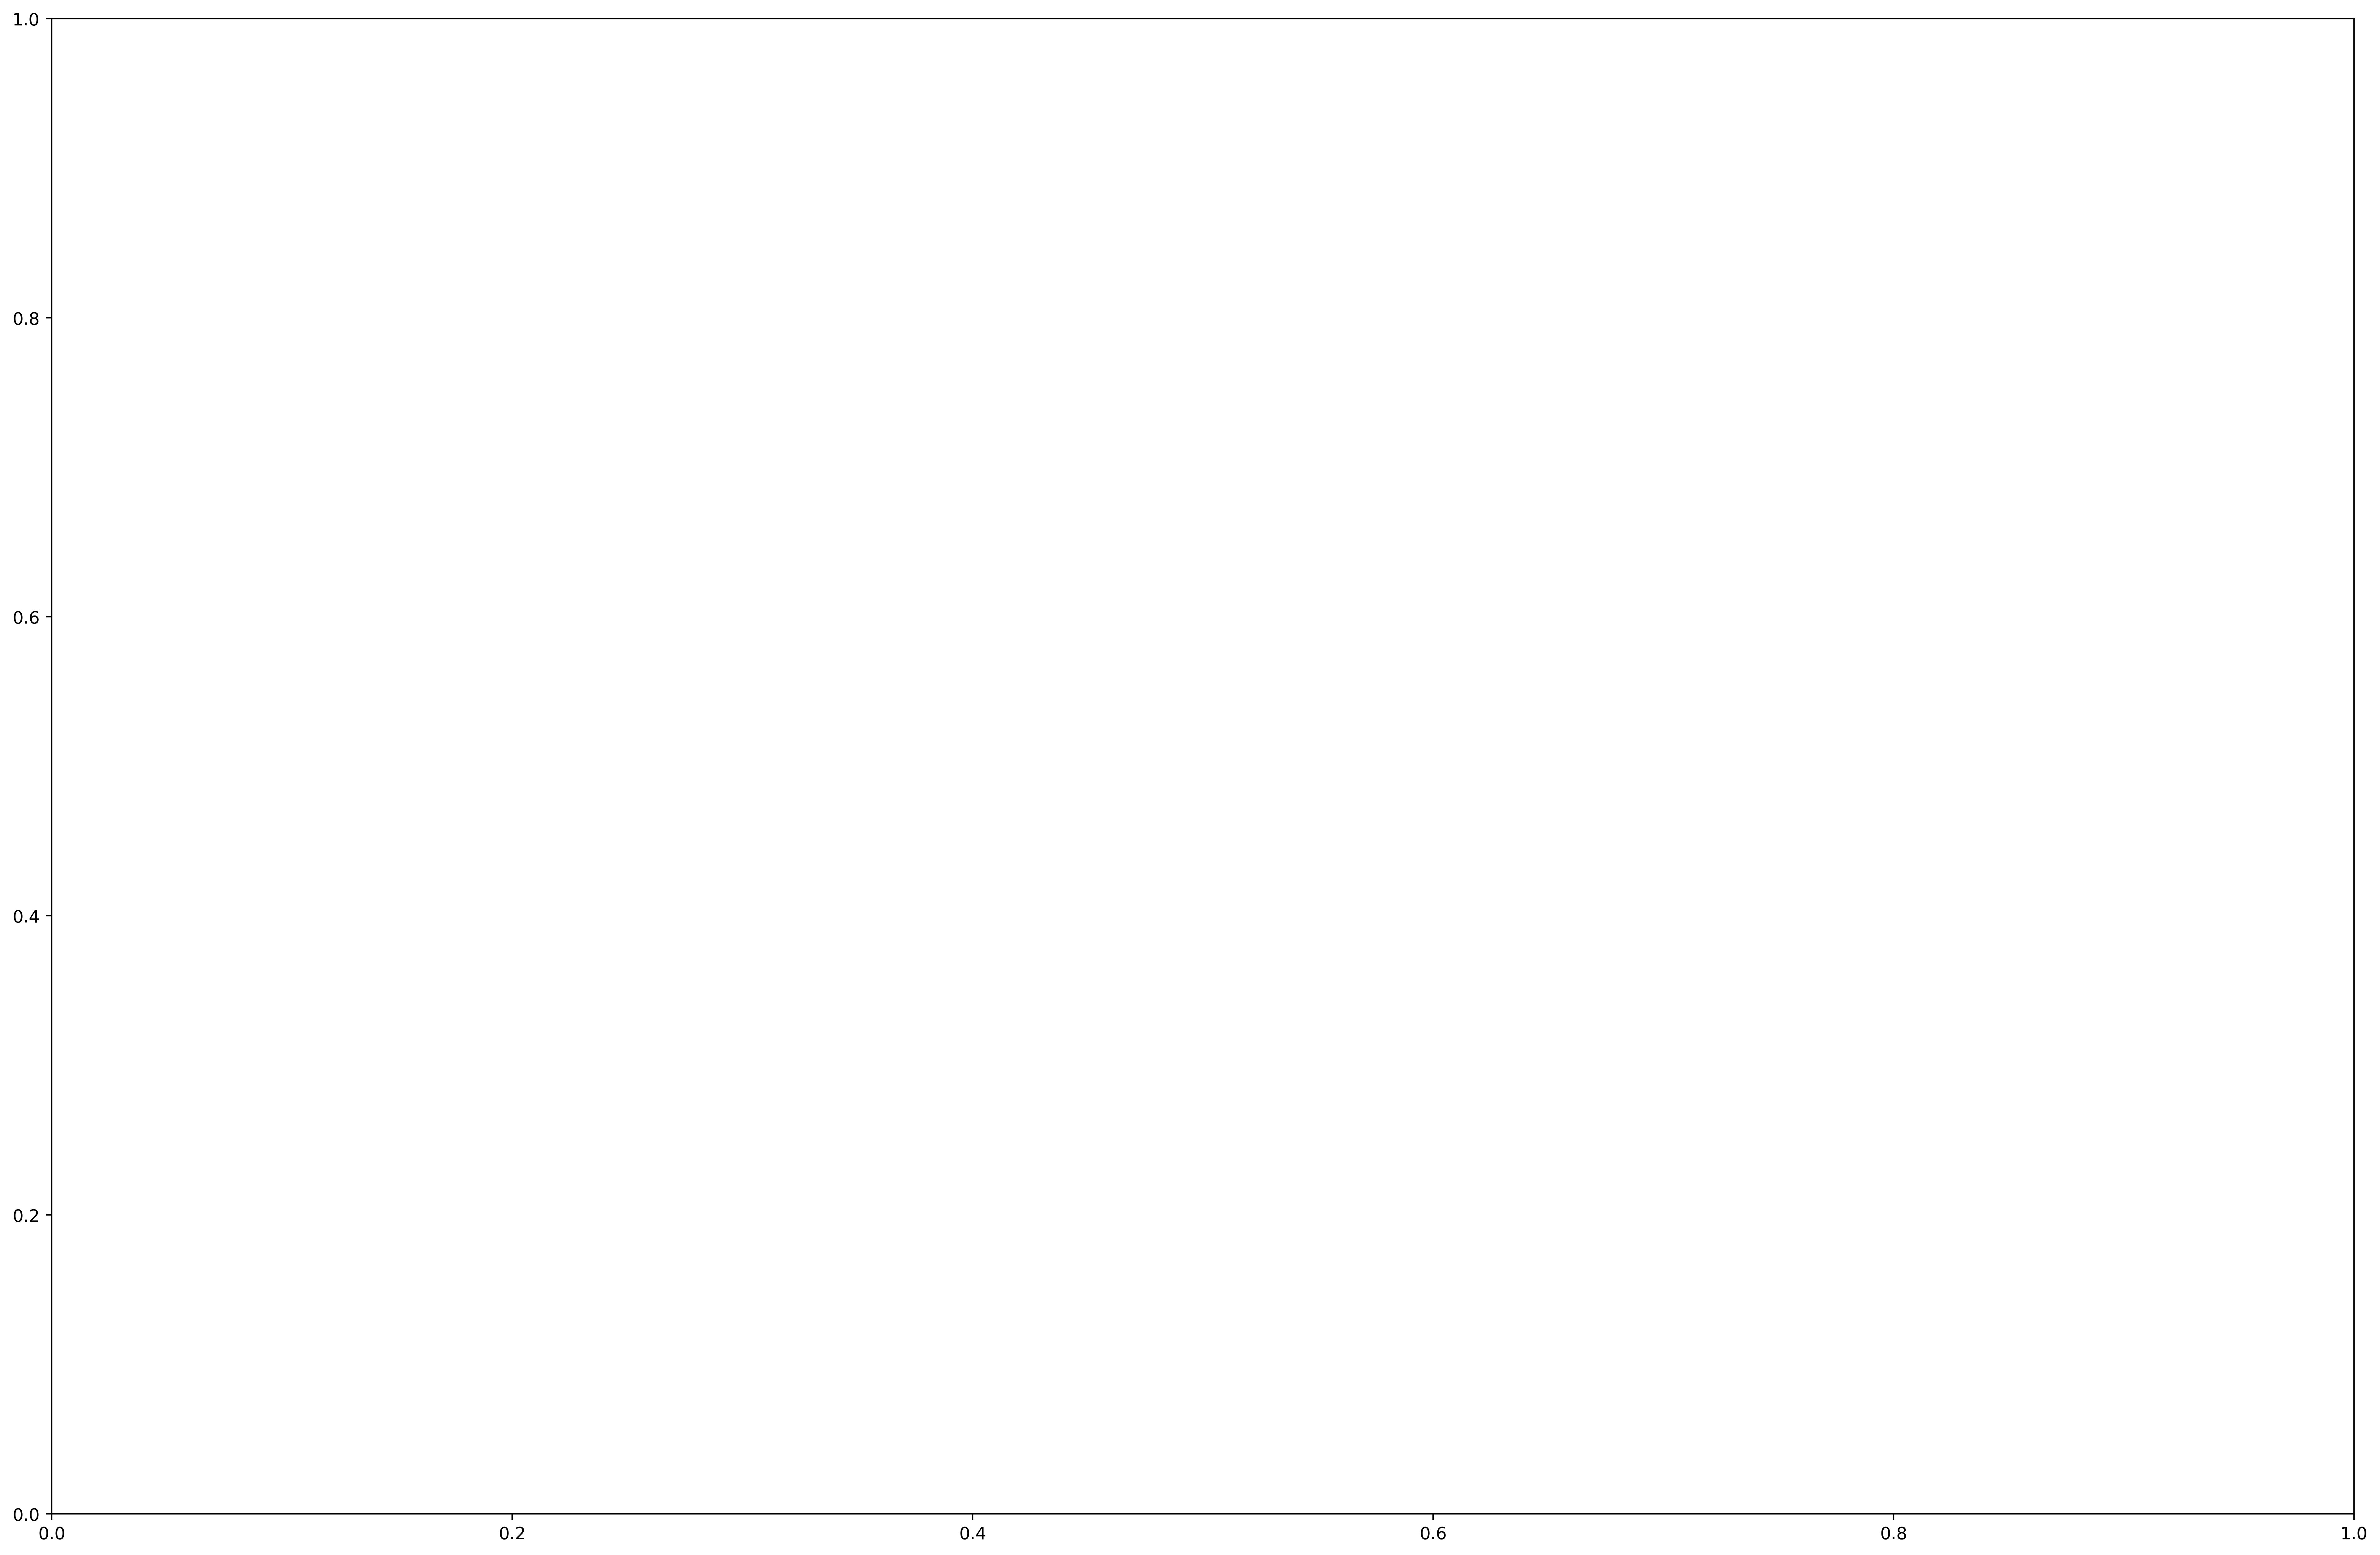

In [22]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(24,16), dpi=200, facecolor='w', edgecolor='k')
axes = plt.gca()
fig = plt.gcf()

for i in range(1700,1710):
    plt.plot(l1,df1.iloc[i][l1],c='r')
    plt.plot(l1,df1.iloc[i+4000][l1],c='b')
  
fig.savefig('wihoutcluster.png', dpi=200)

IndexError: single positional indexer is out-of-bounds

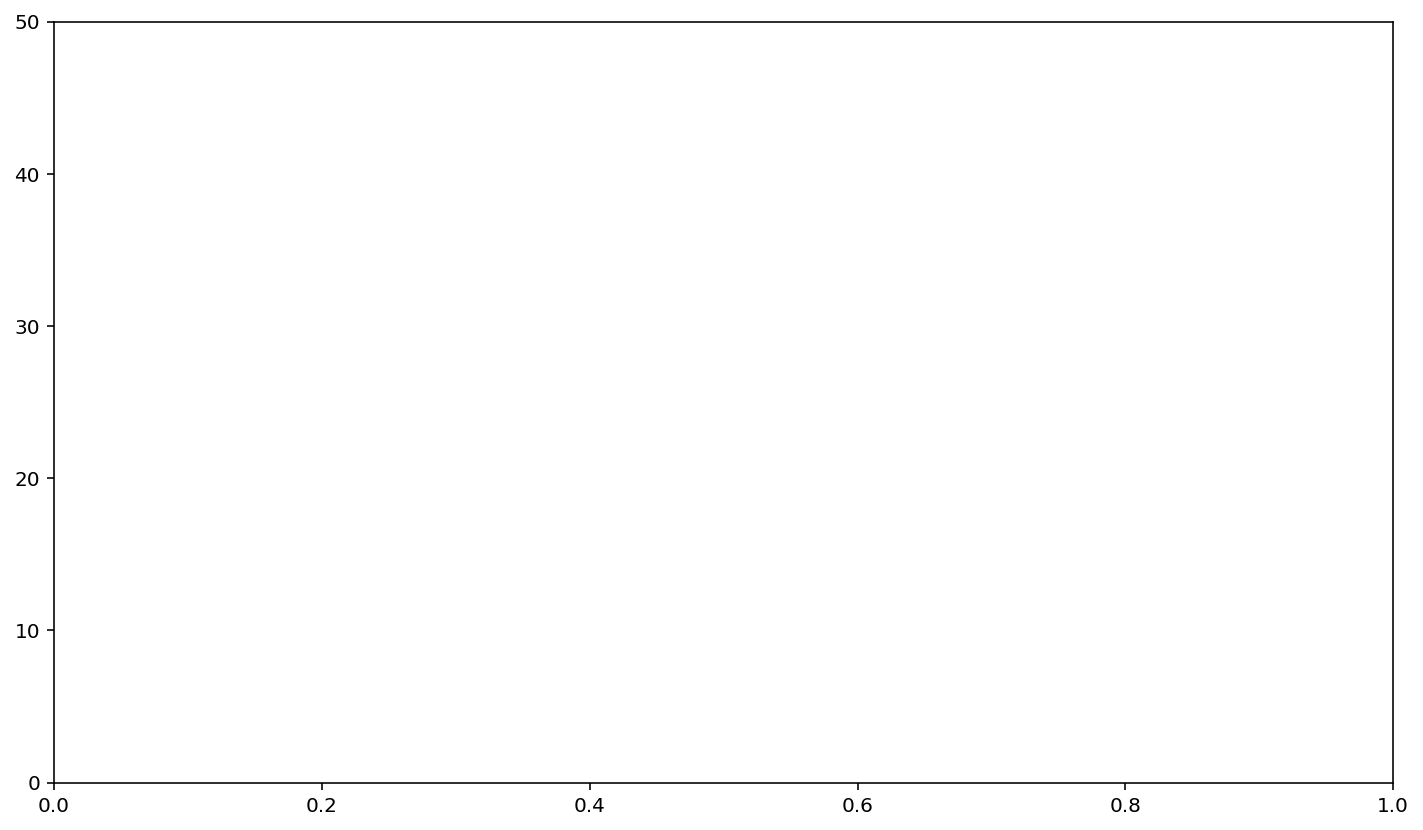

In [23]:

axes = plt.gca()

axes.set_ylim([0,50])
for i in range(5700,5710):
    plt.plot(l1,df1.iloc[i][l1])
    plt.show()

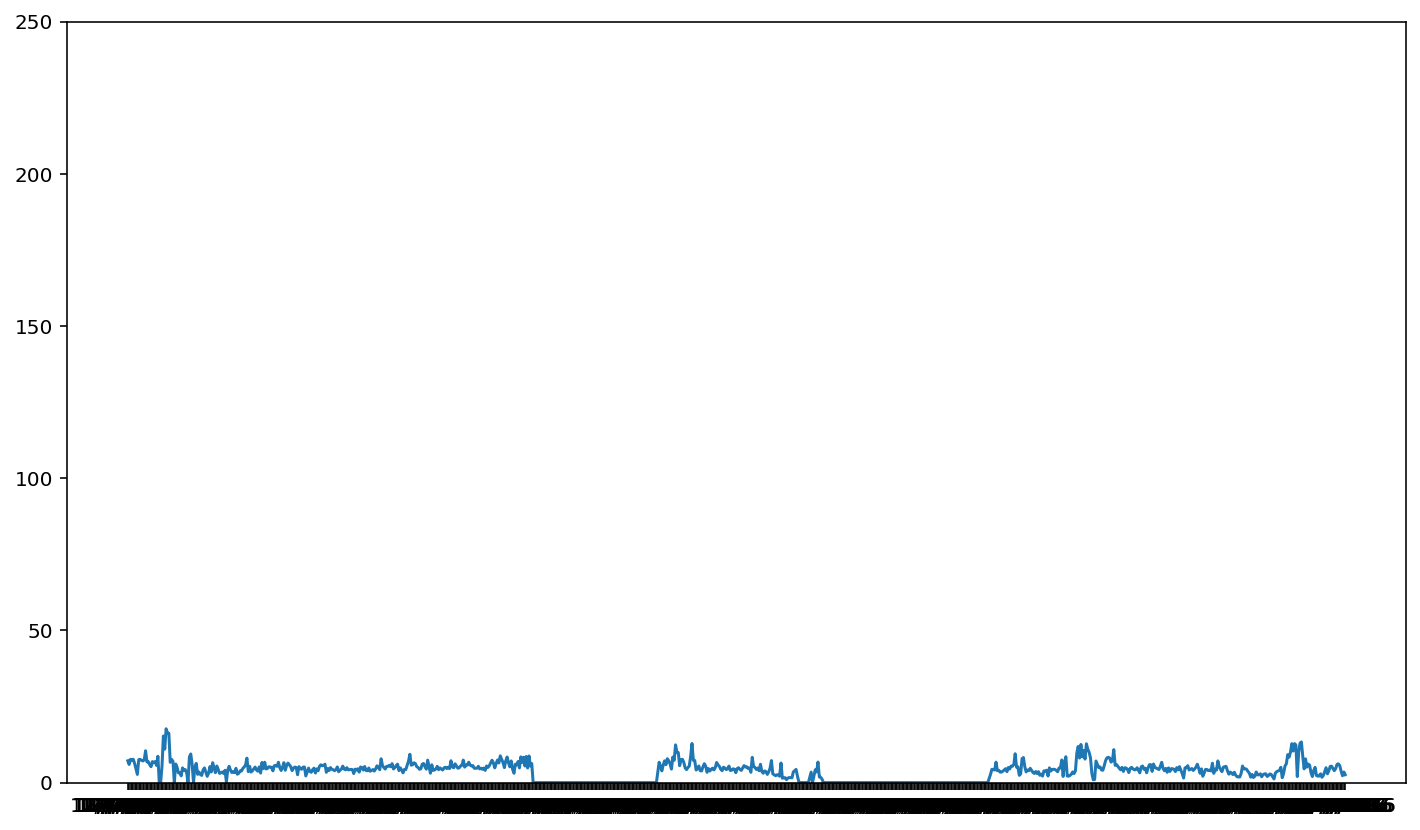

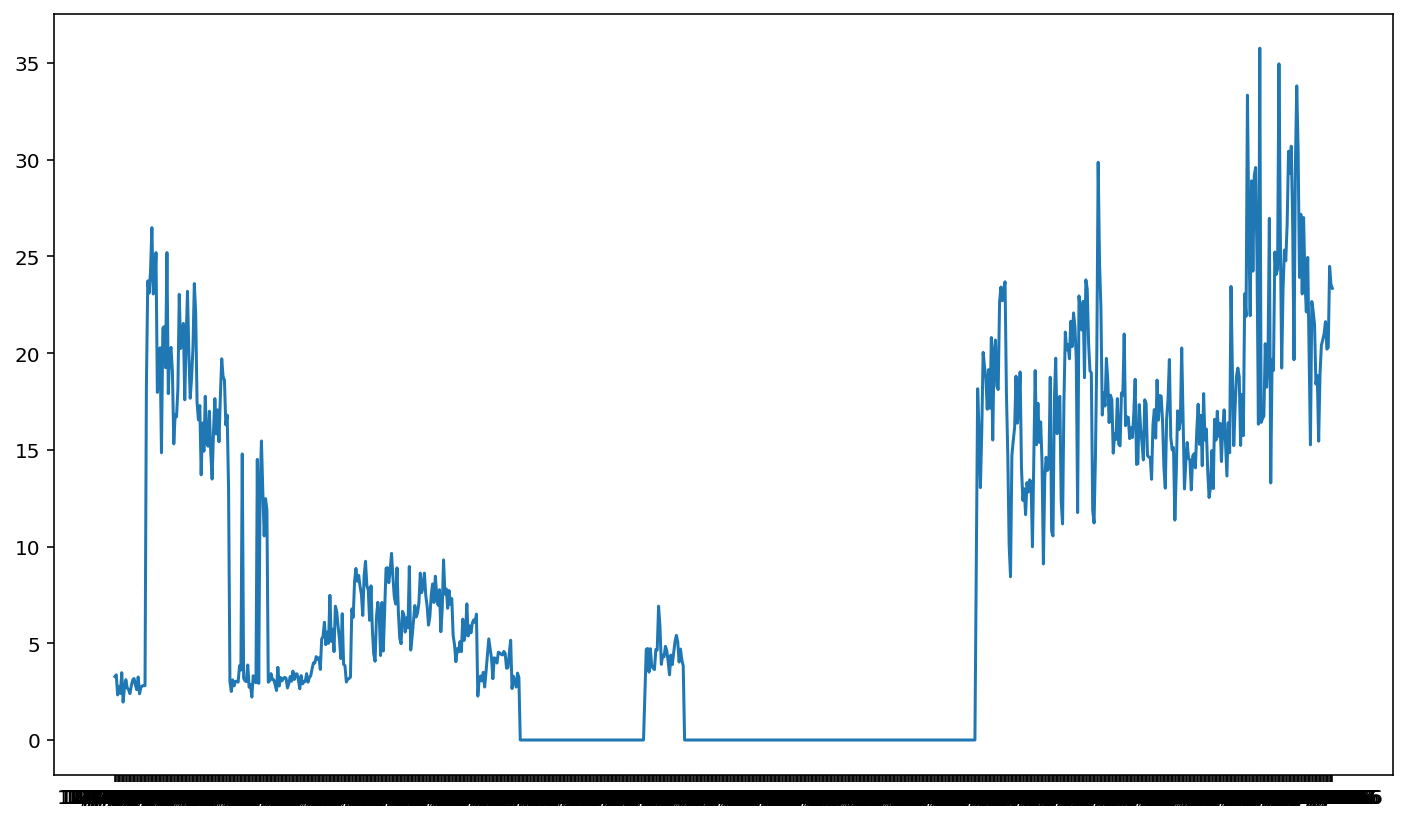

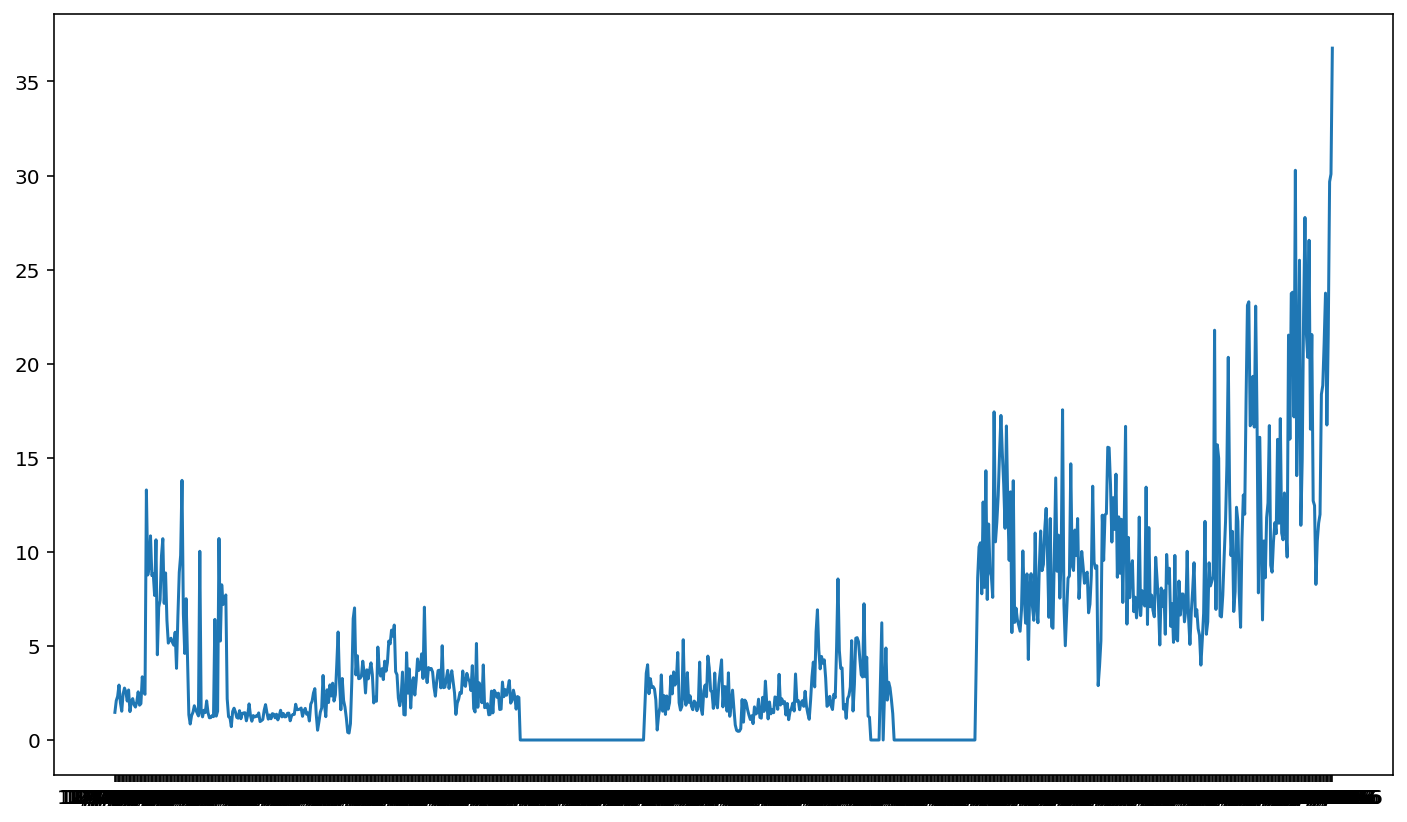

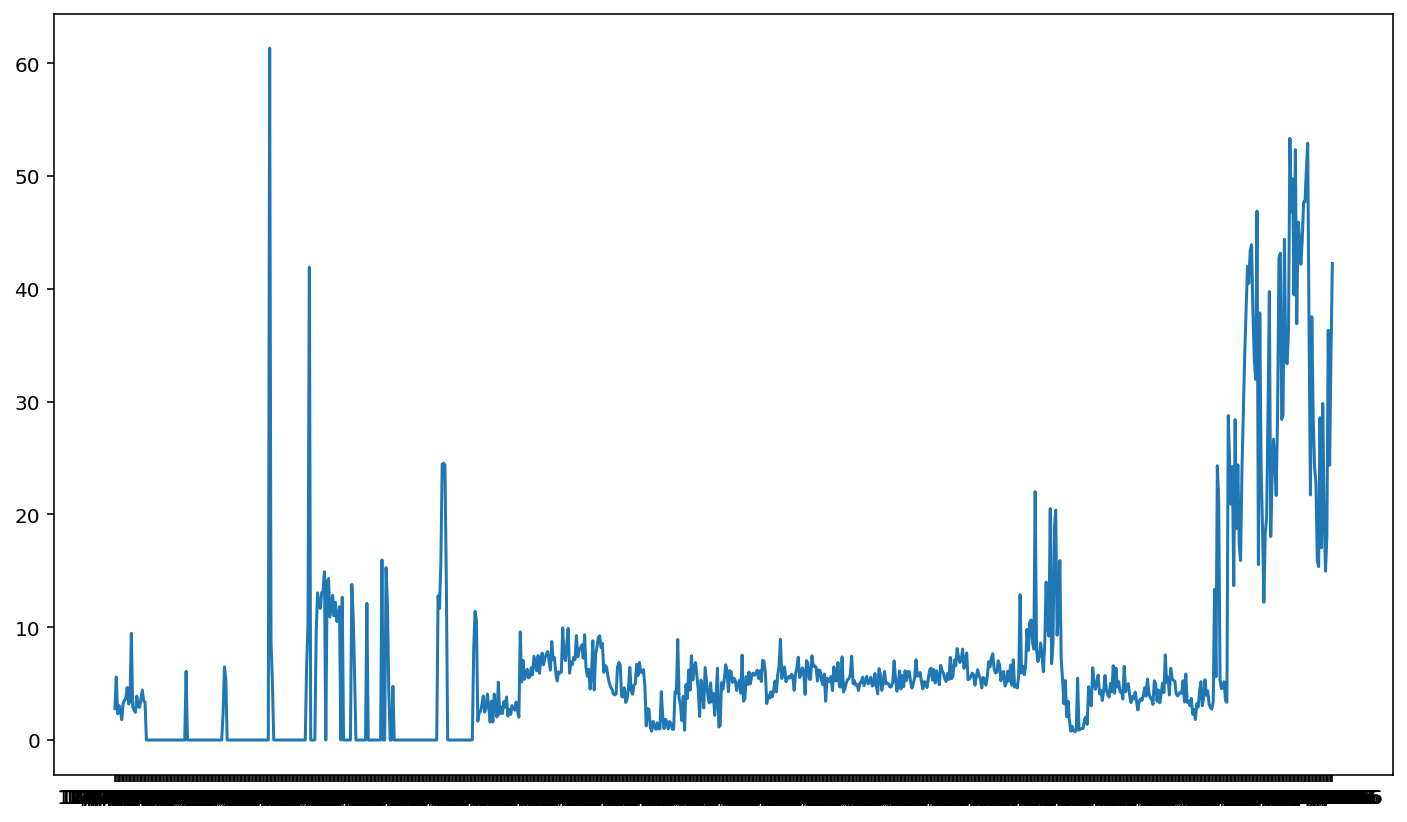

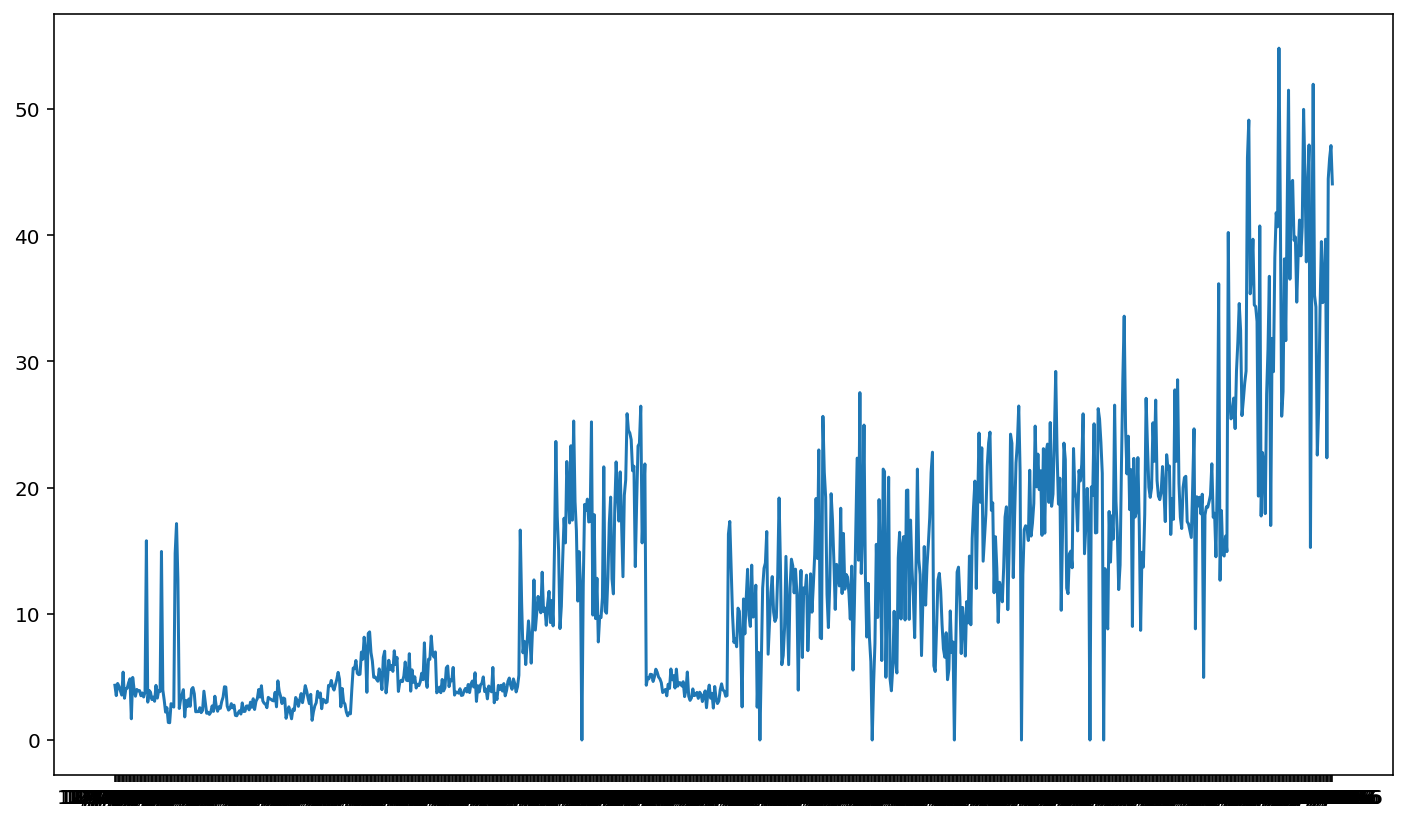

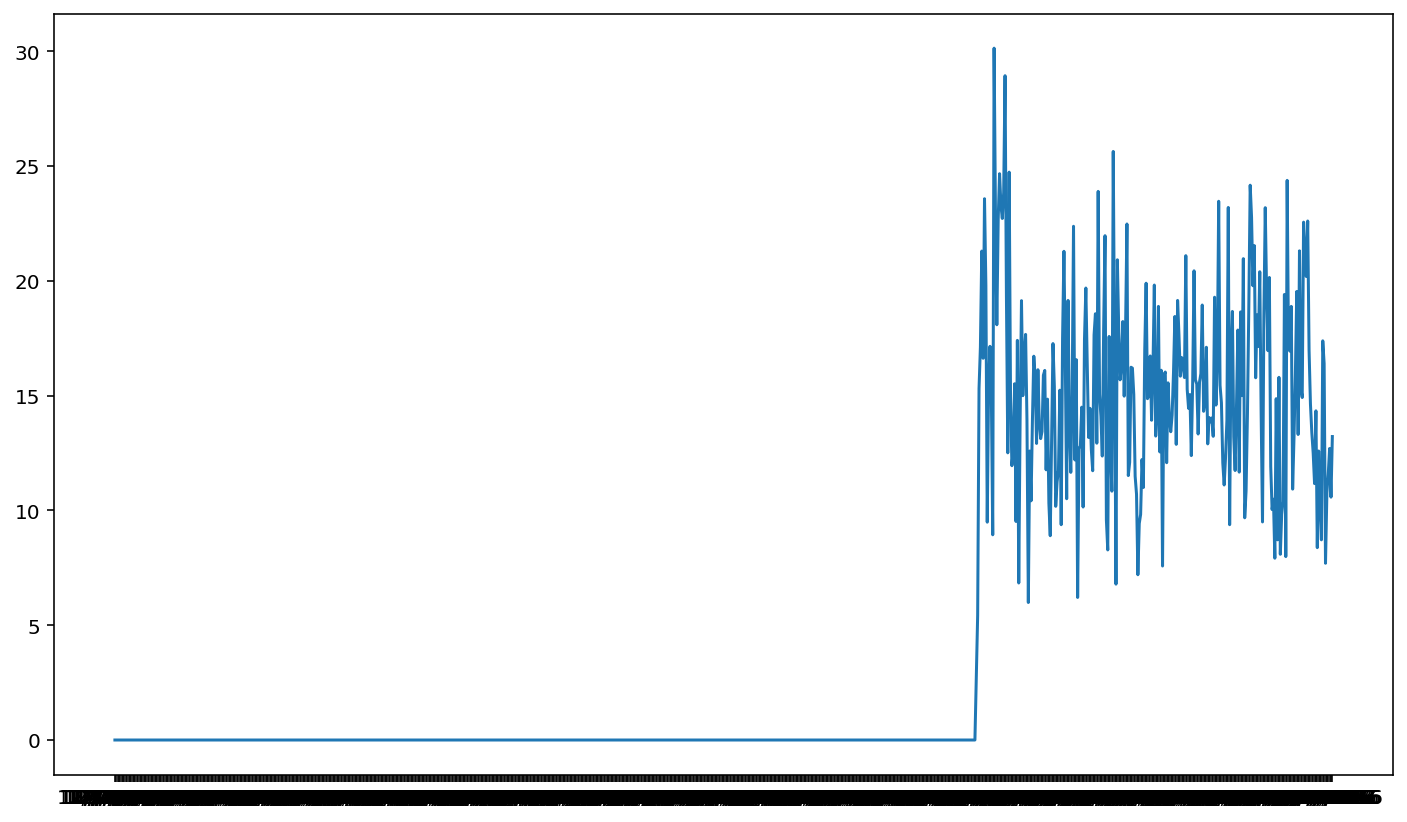

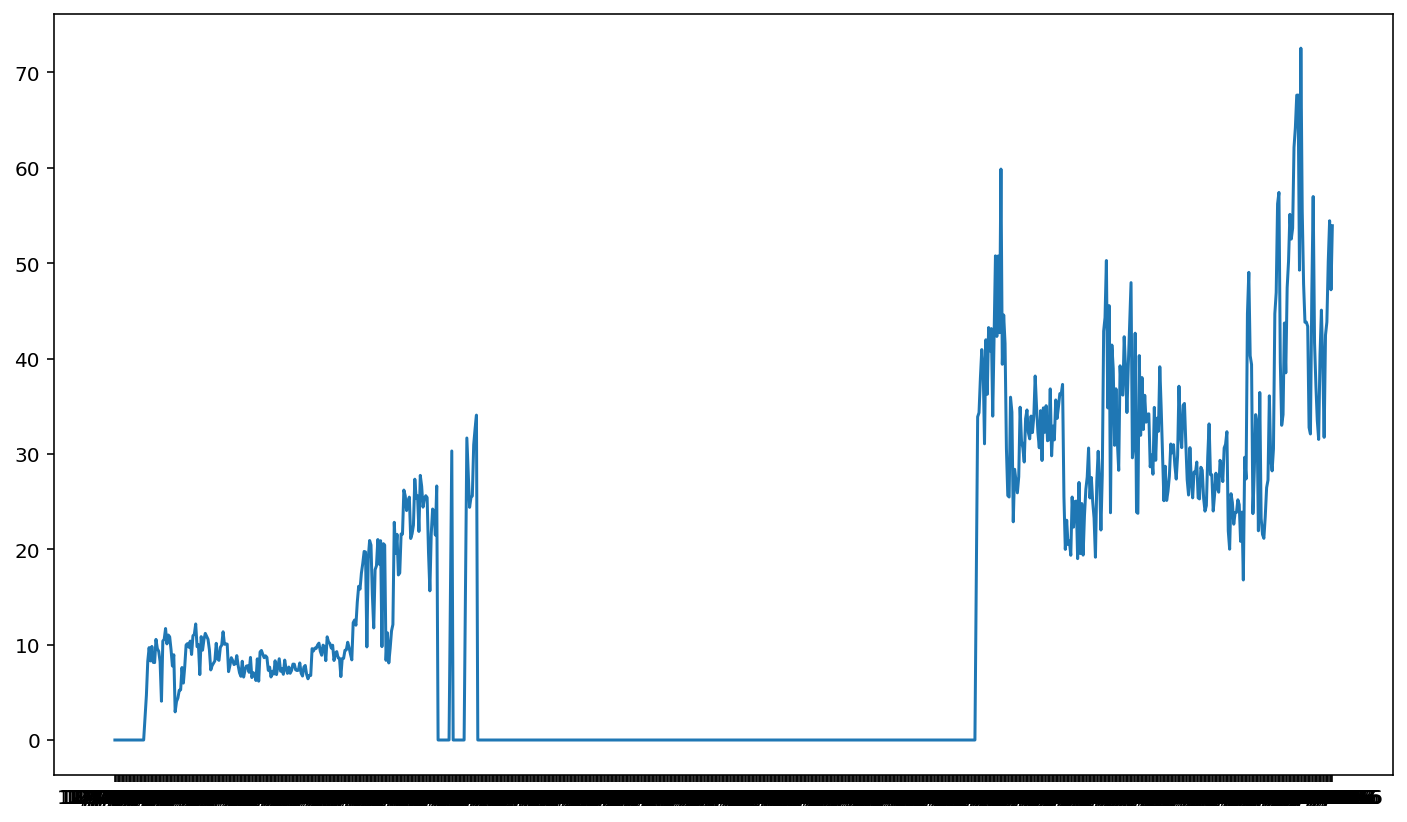

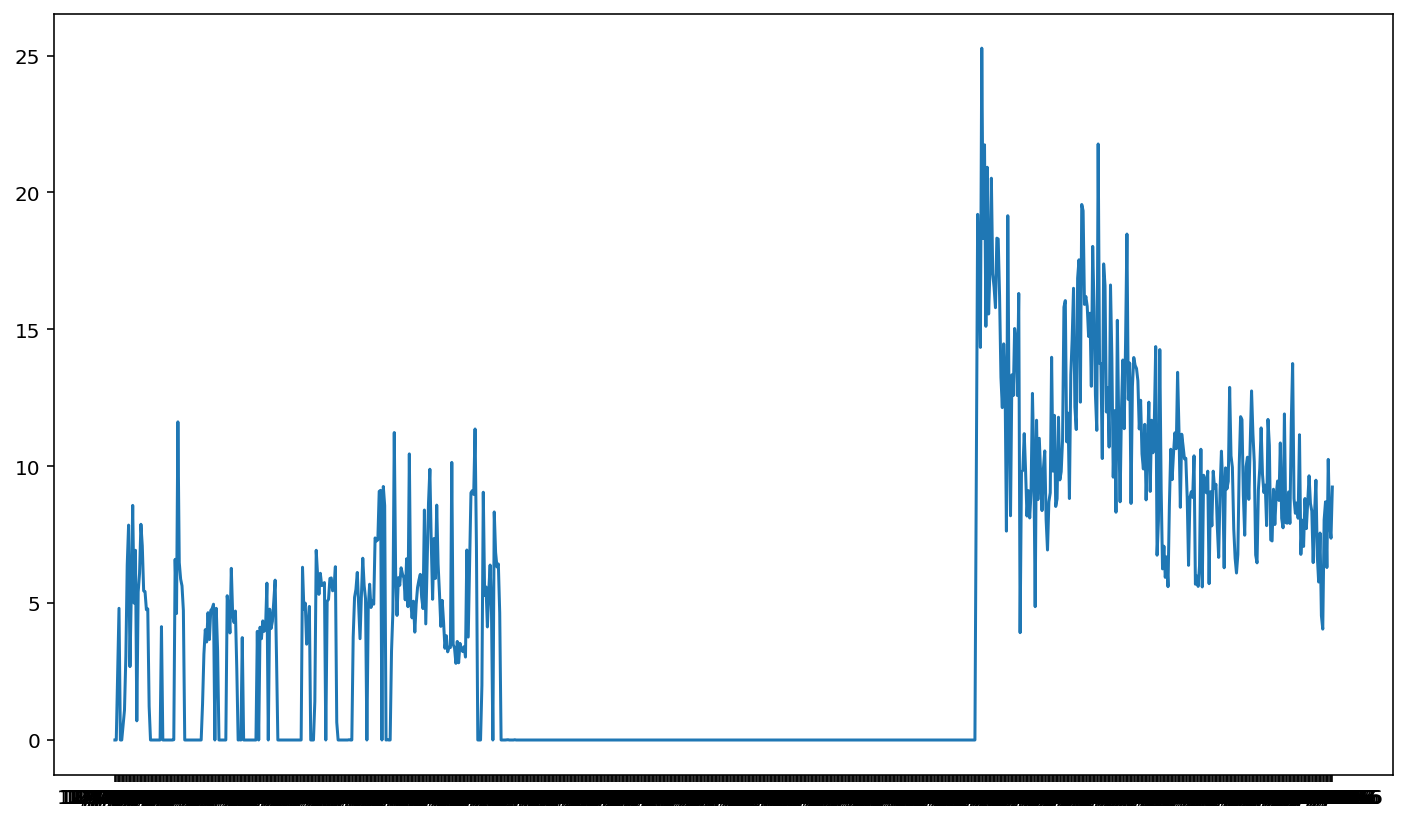

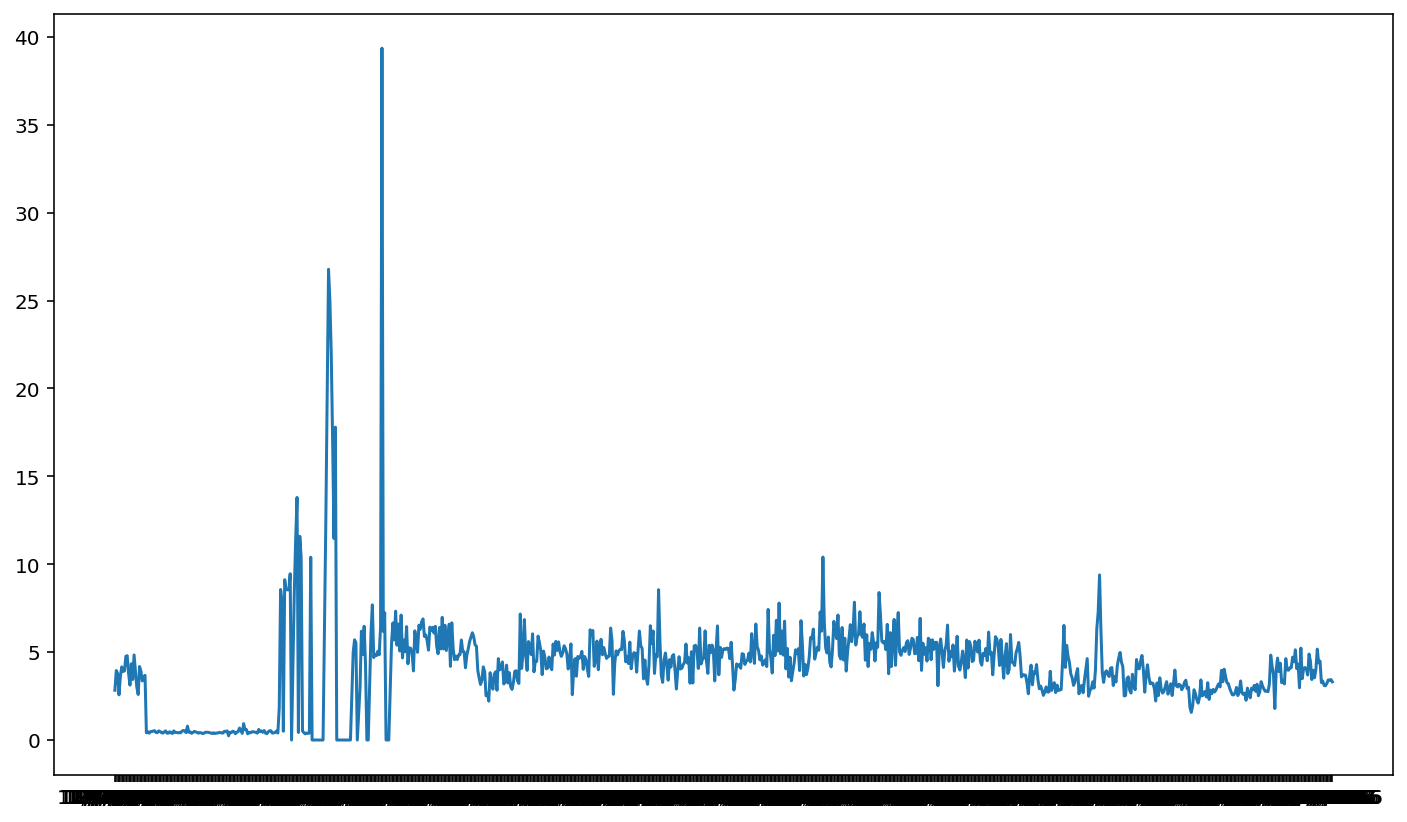

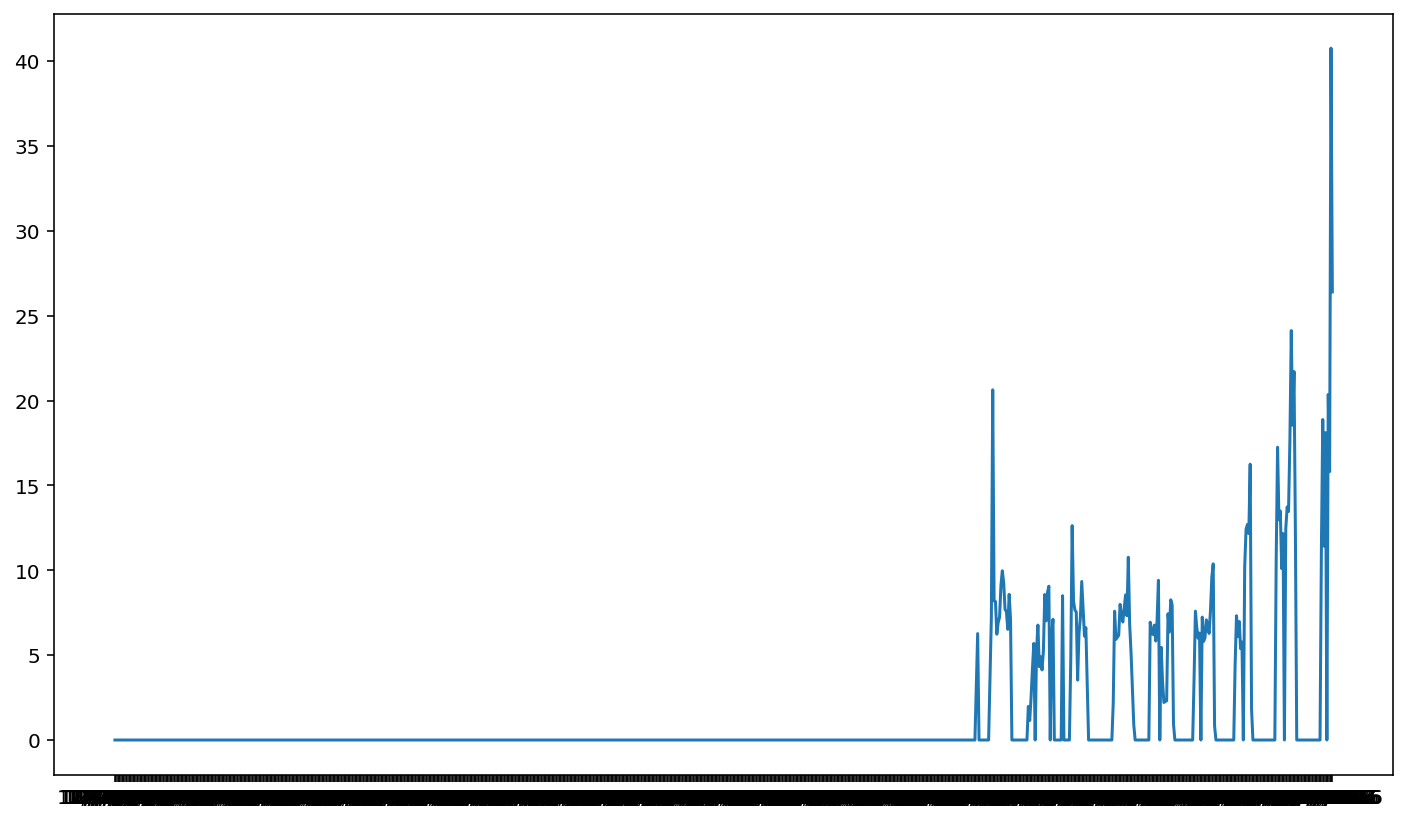

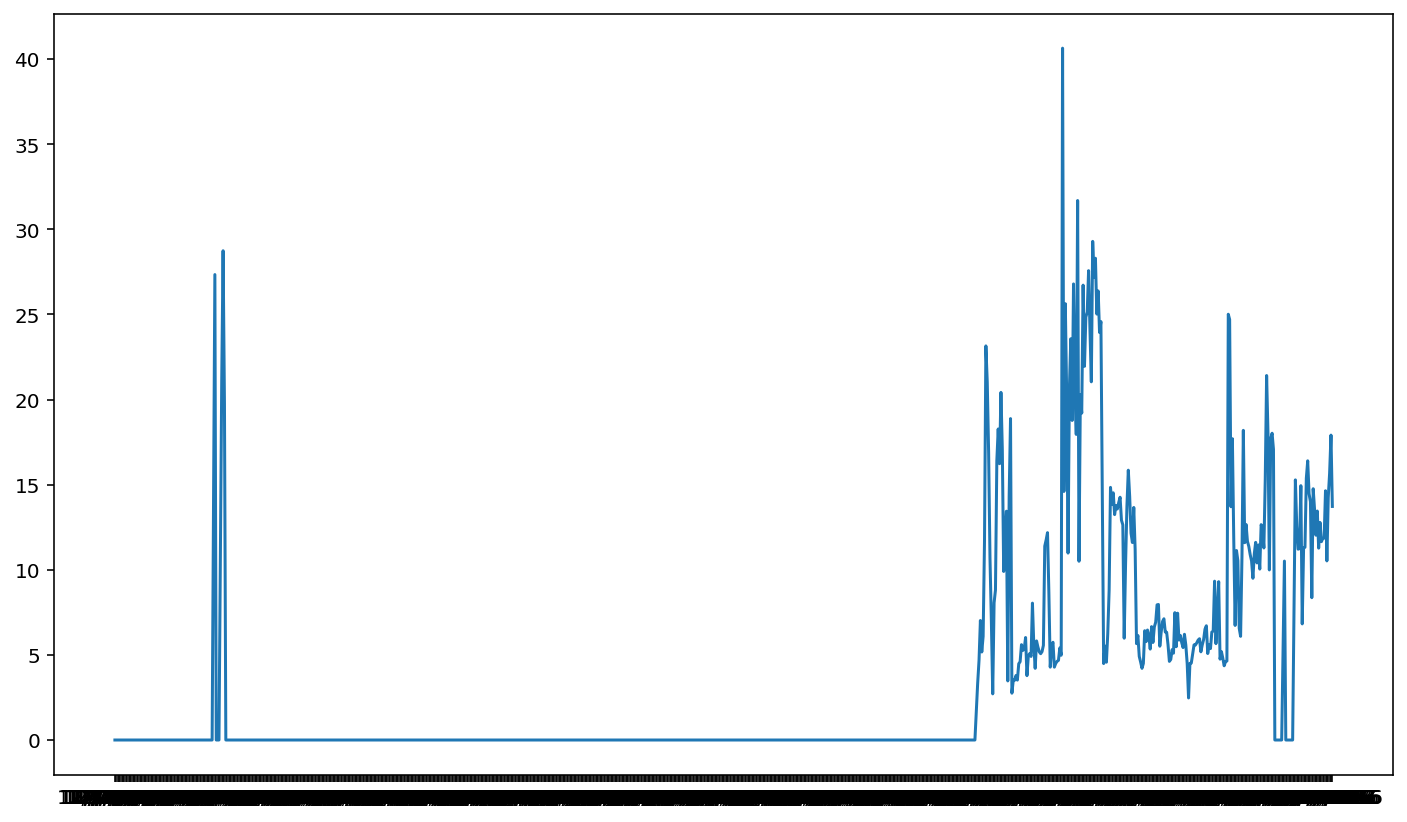

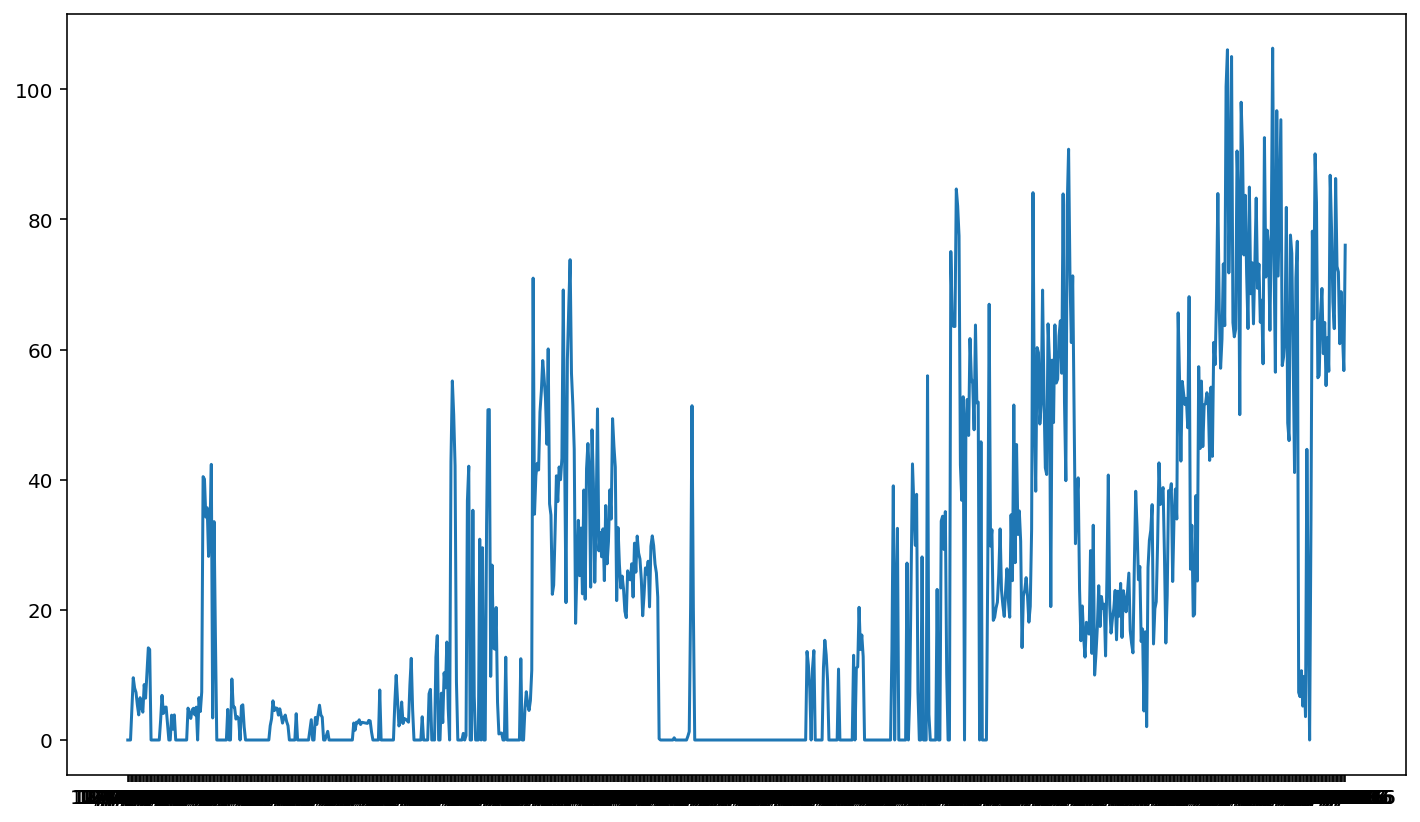

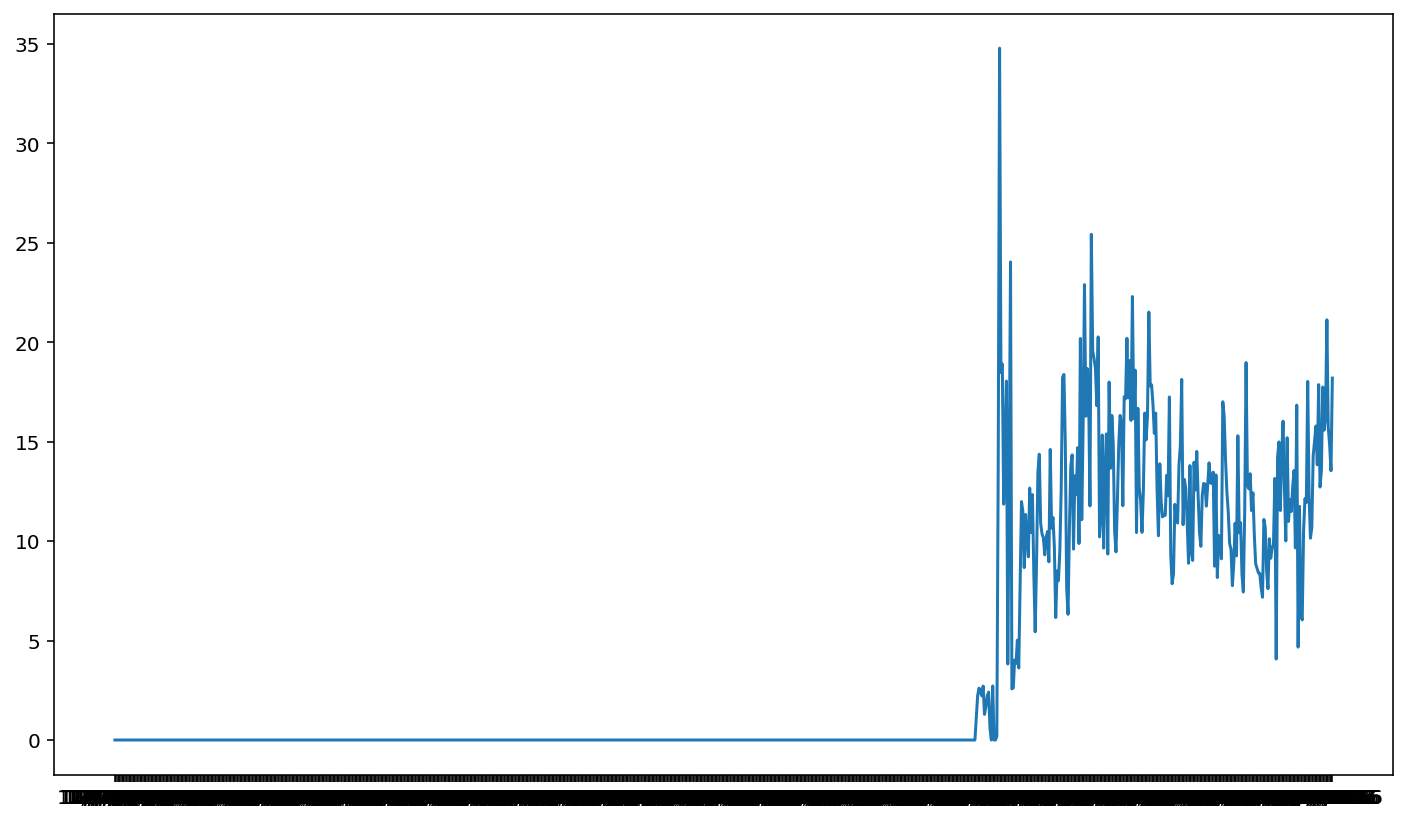

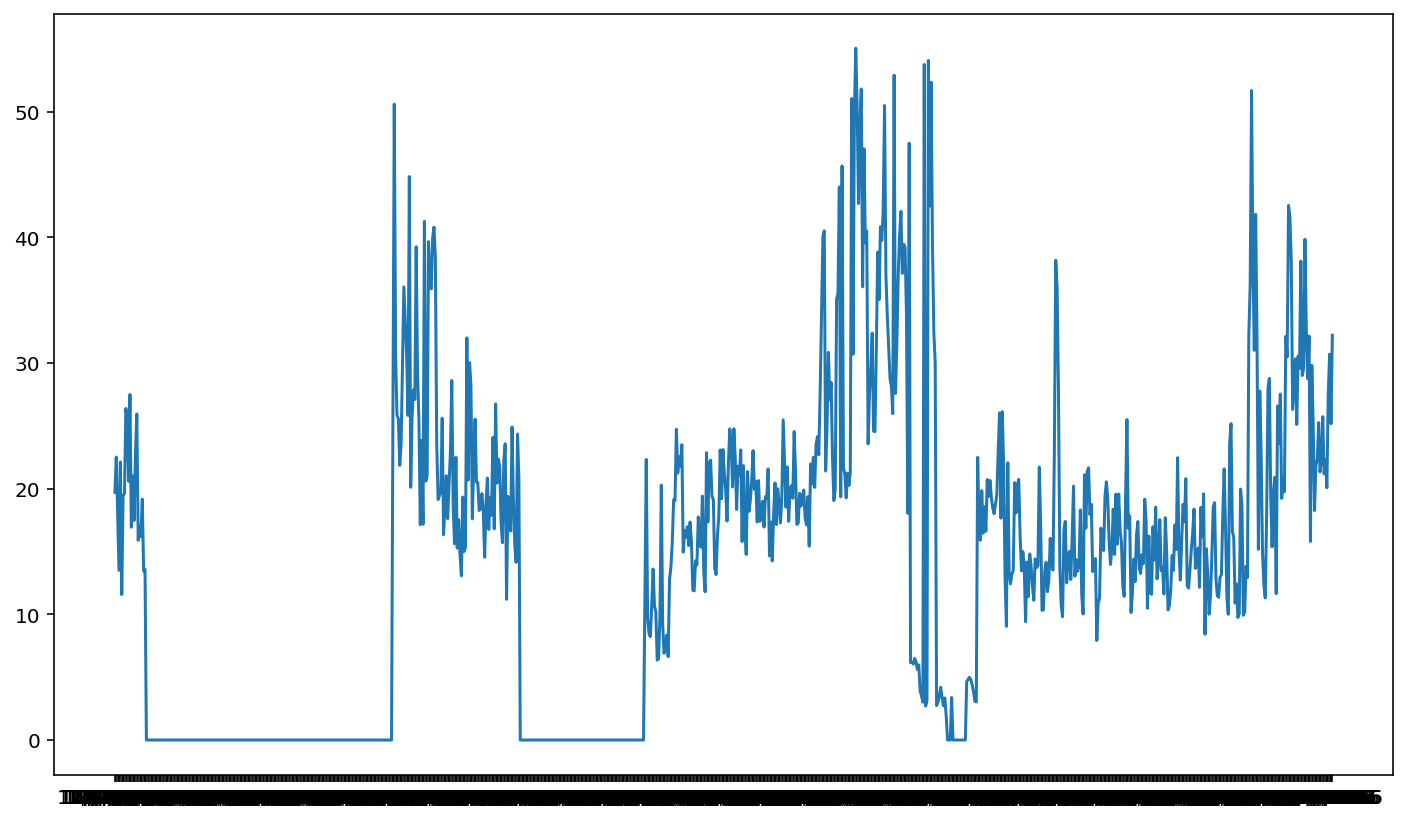

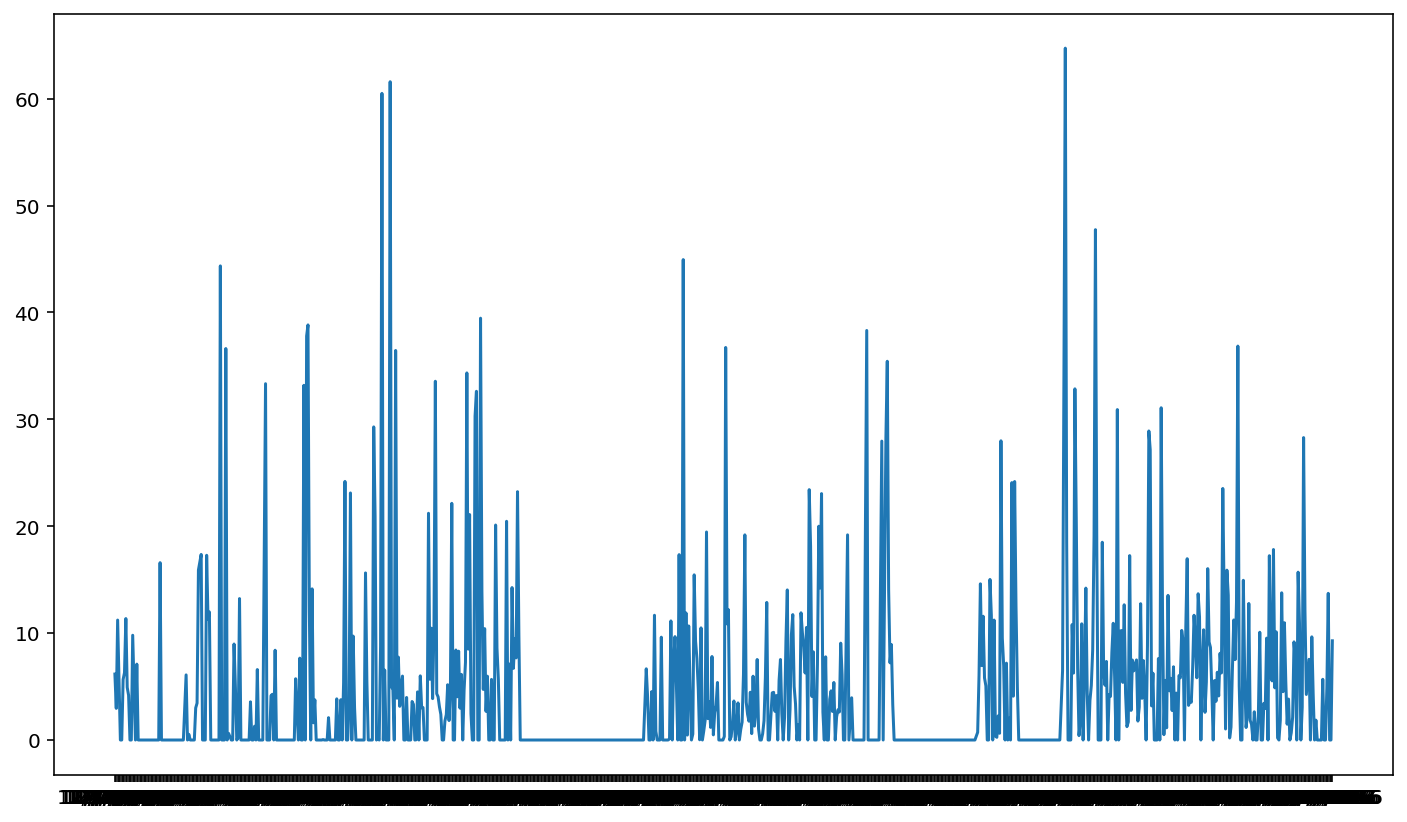

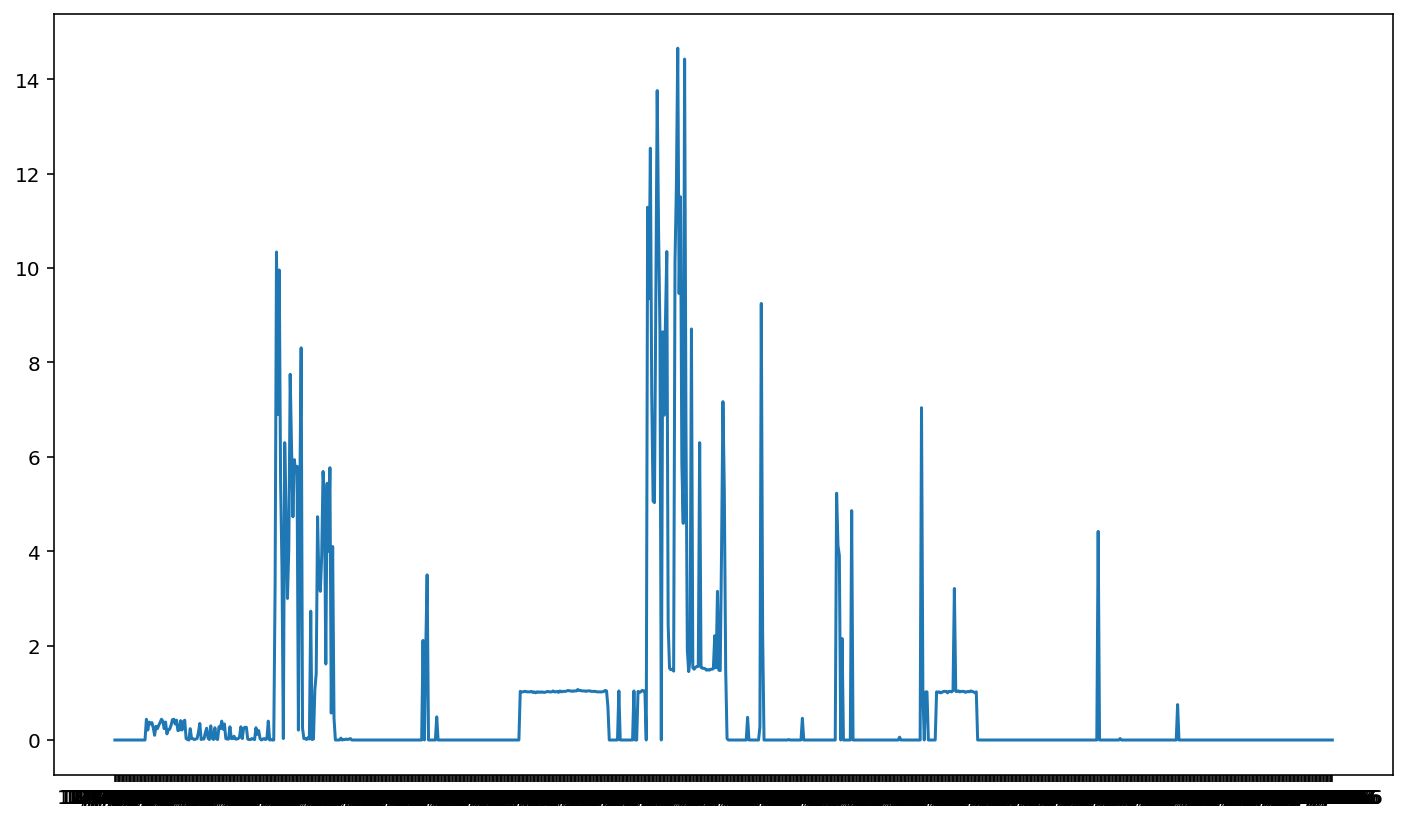

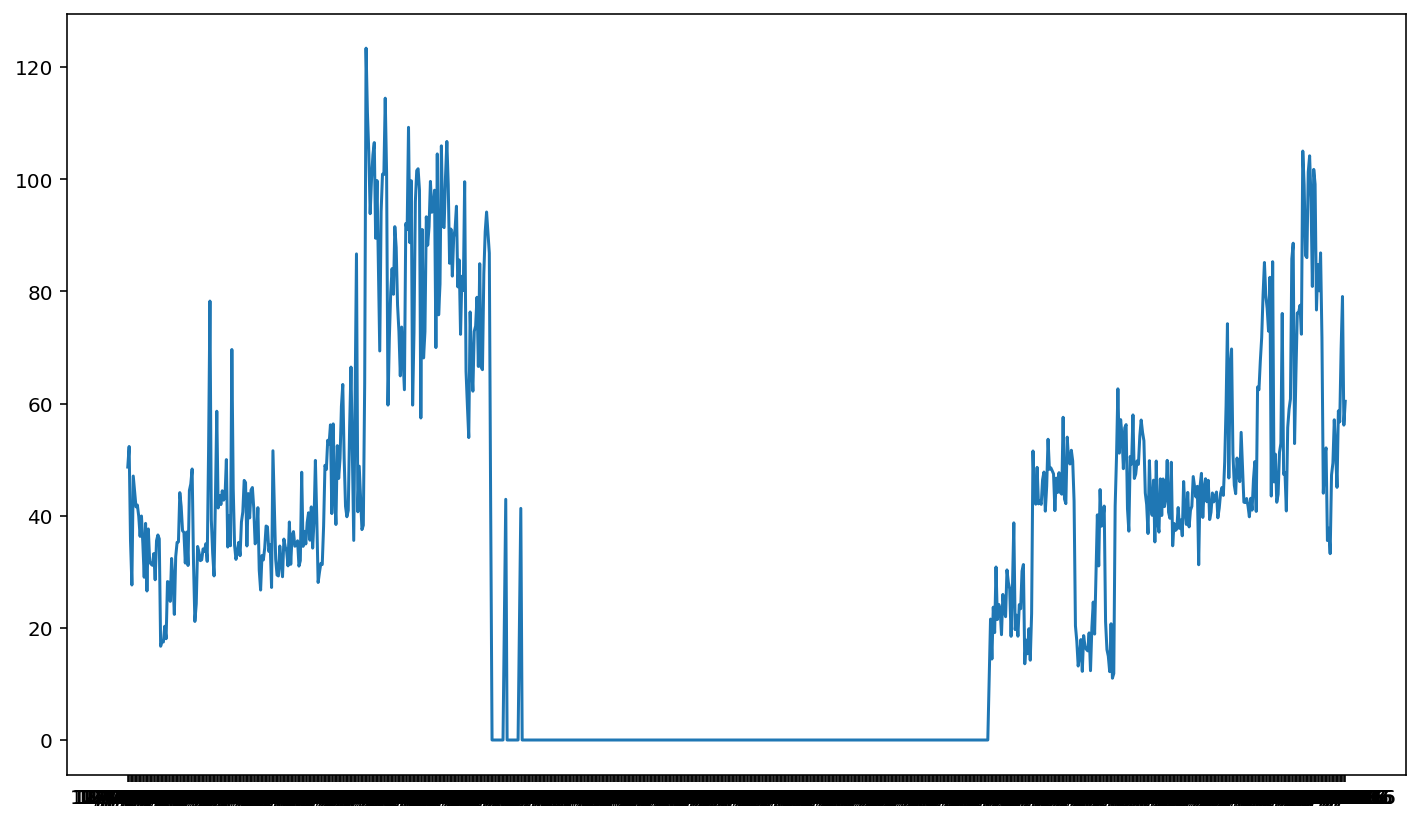

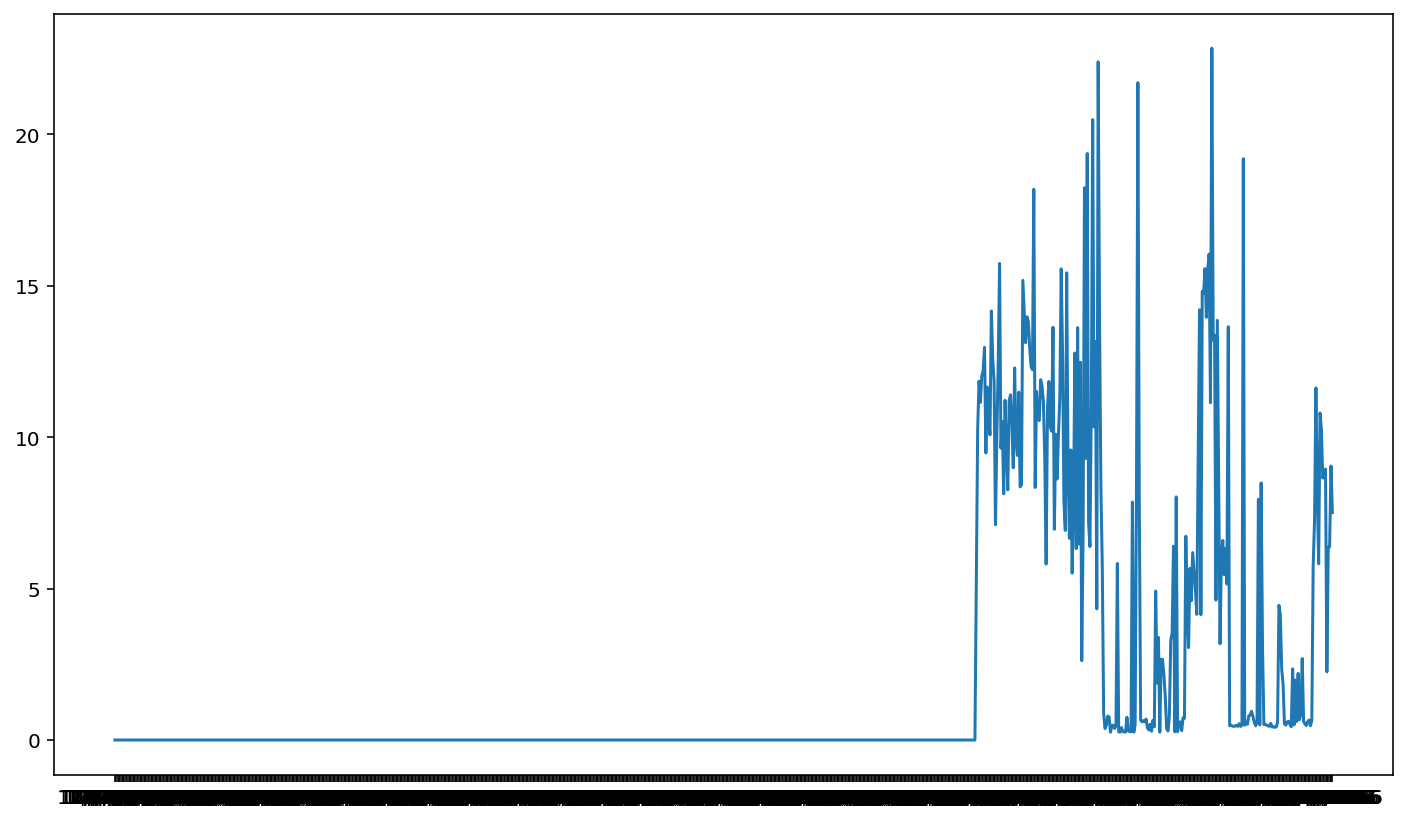

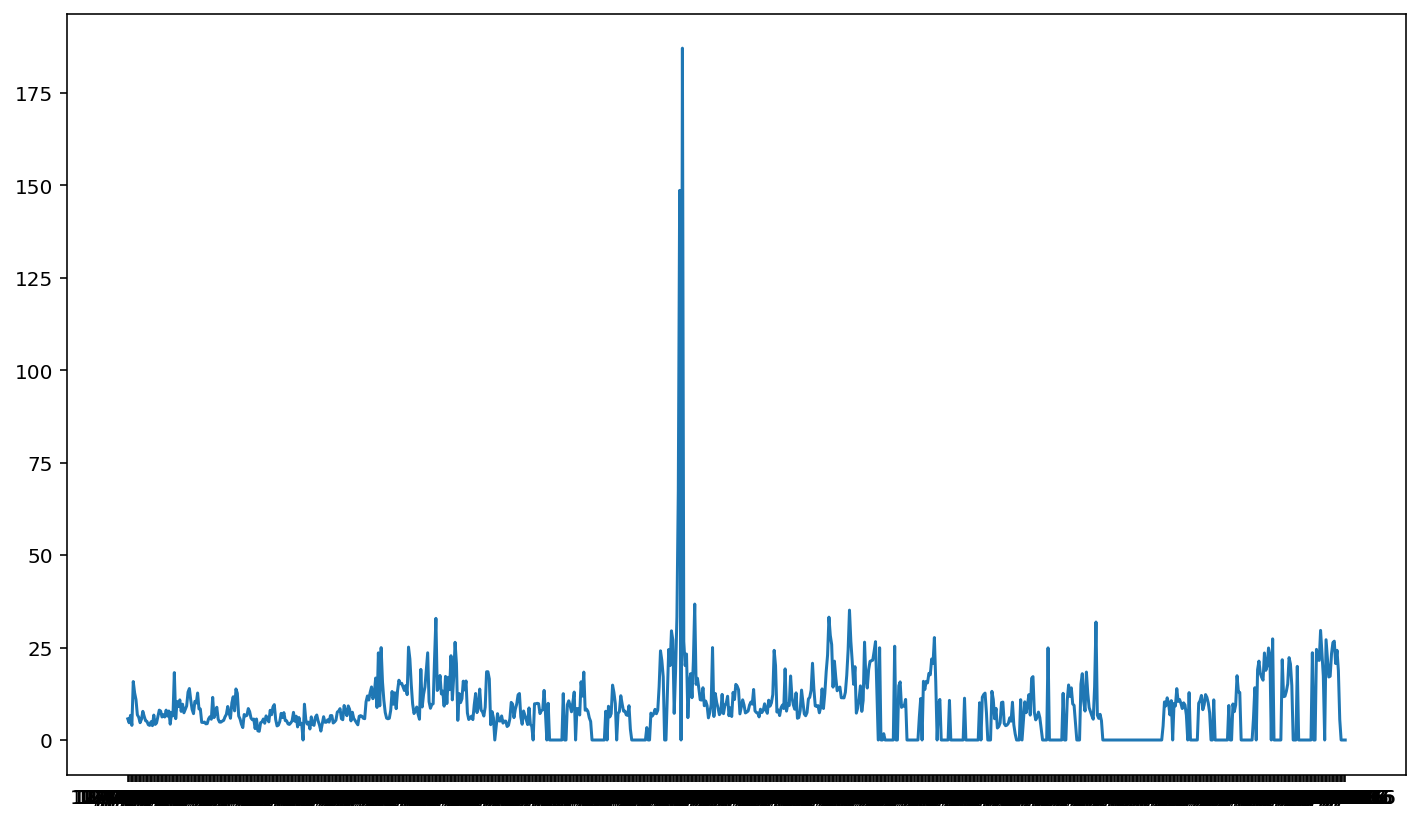

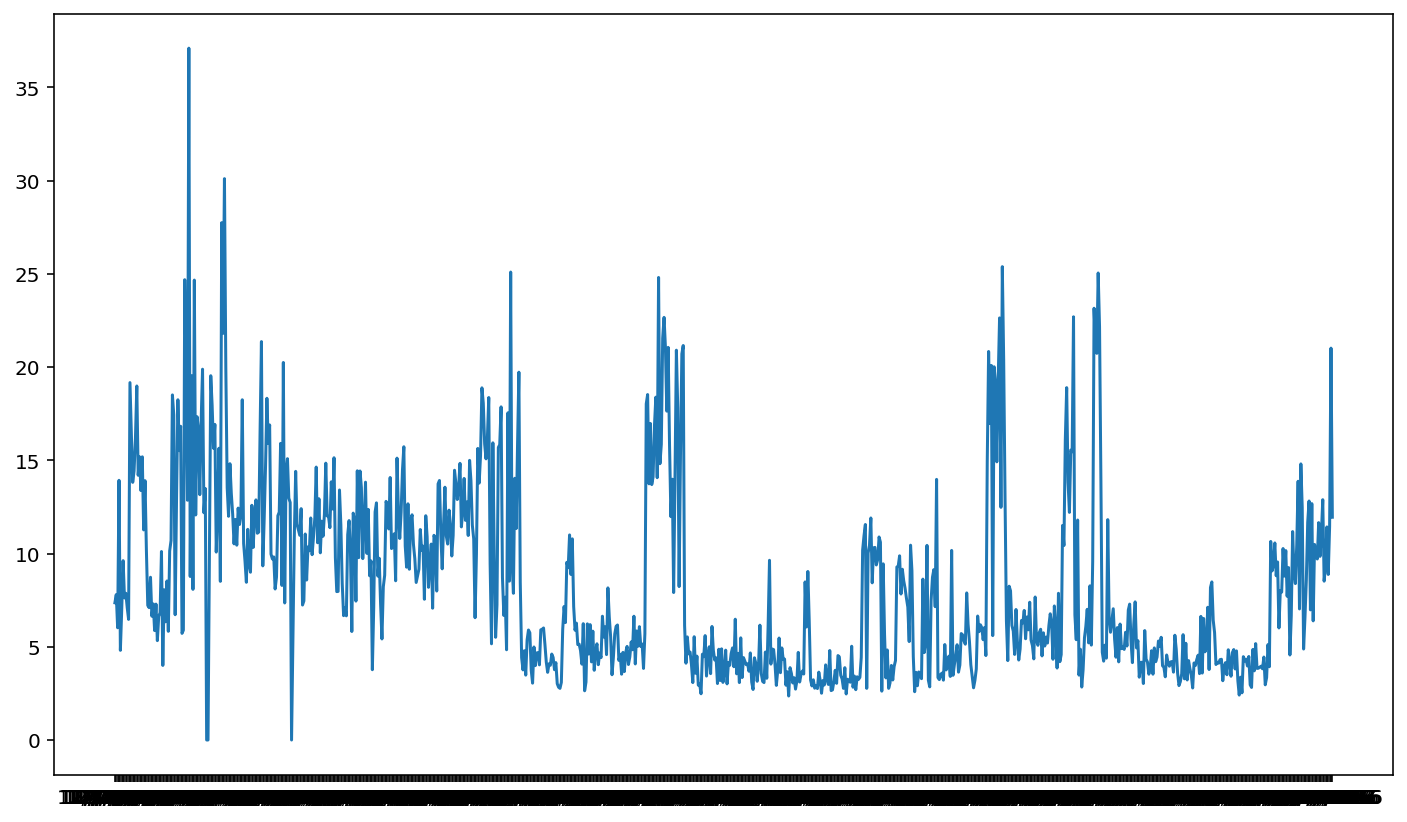

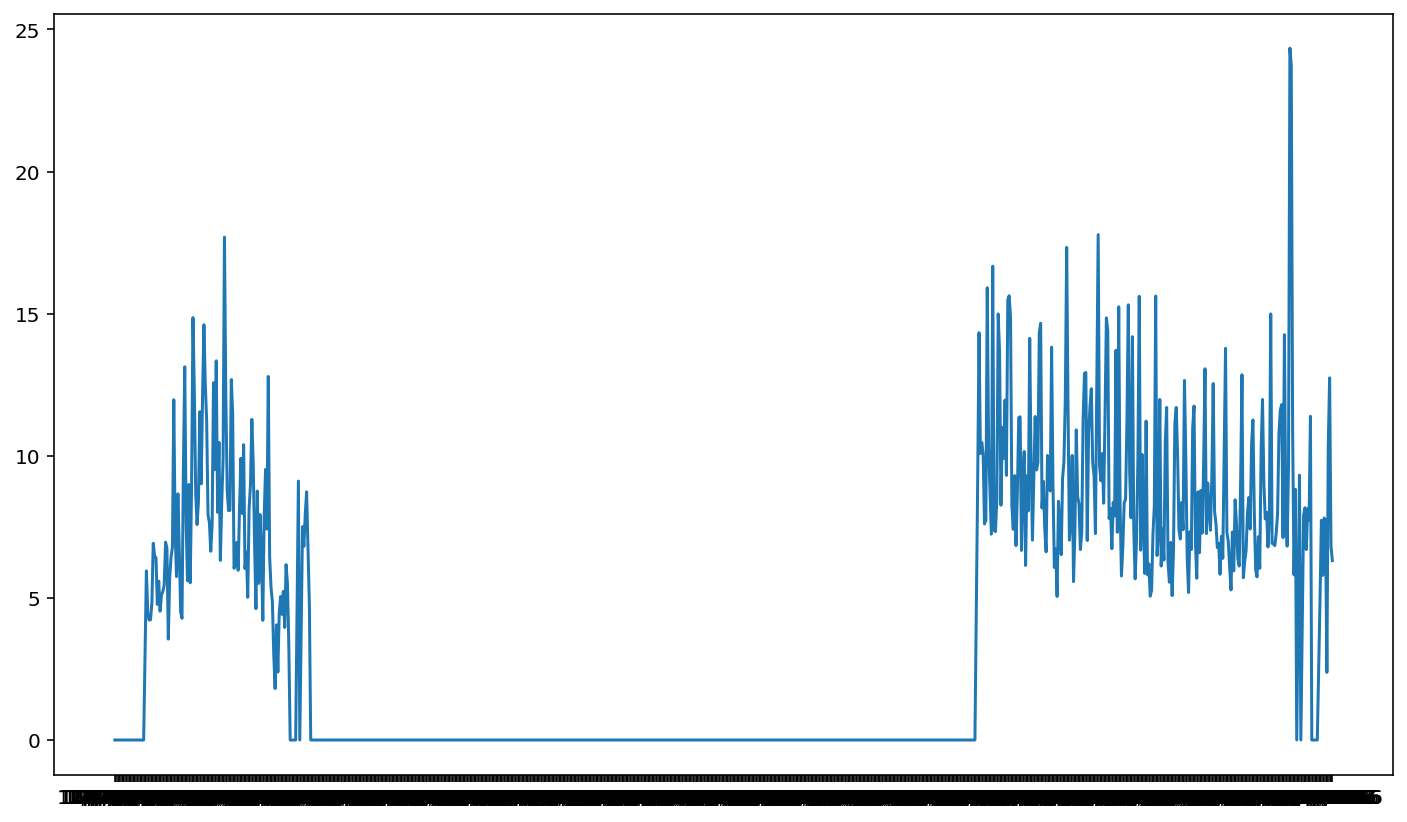

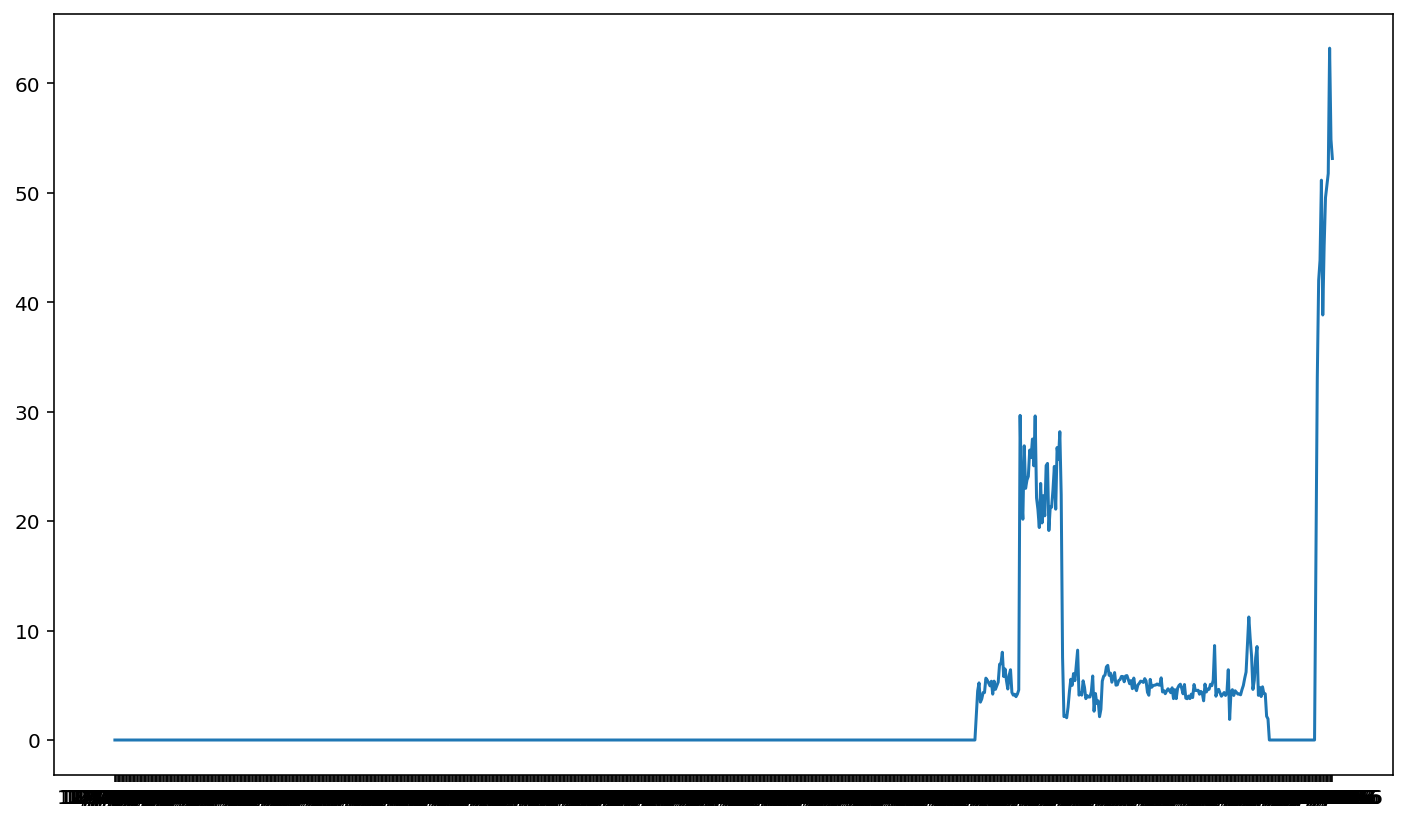

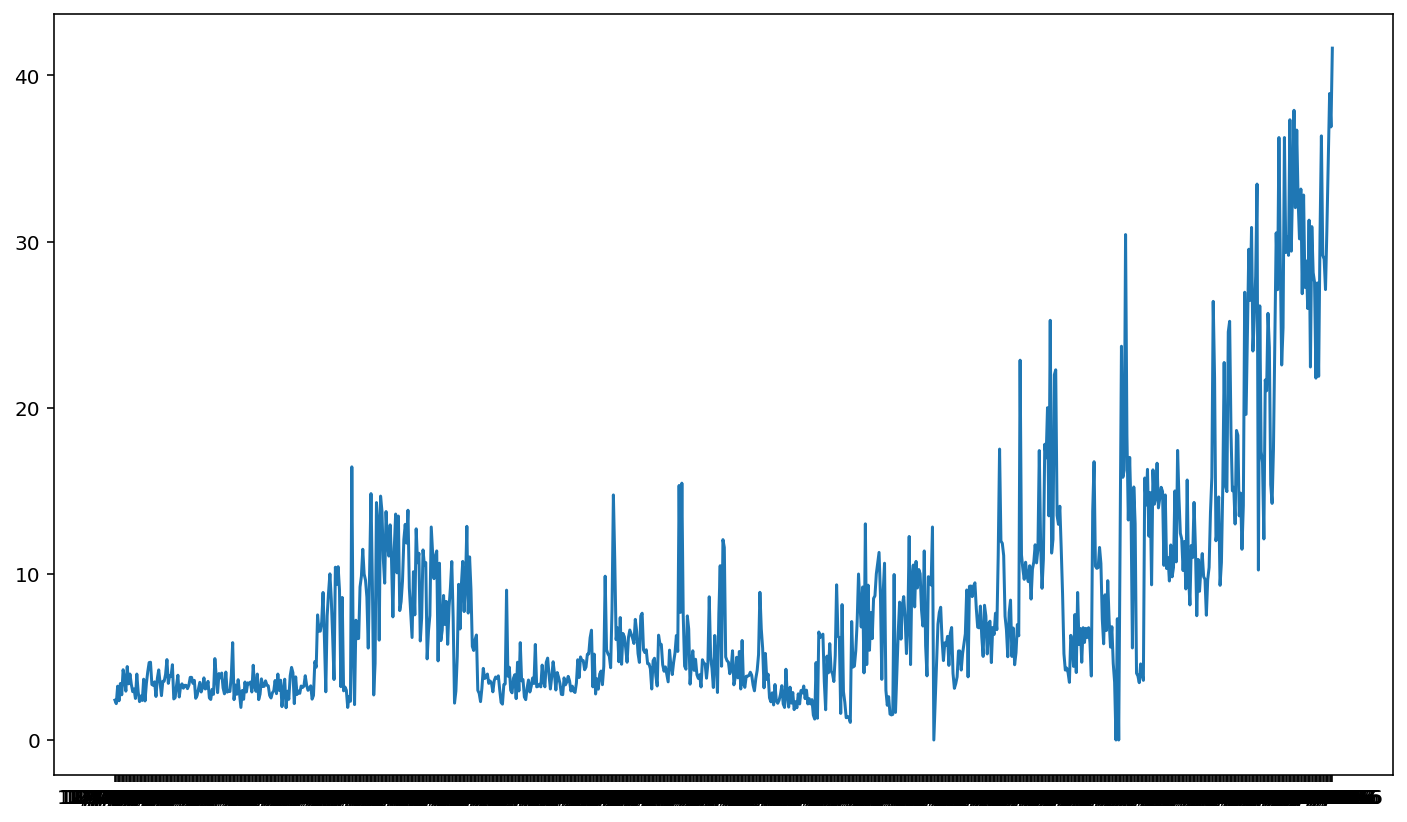

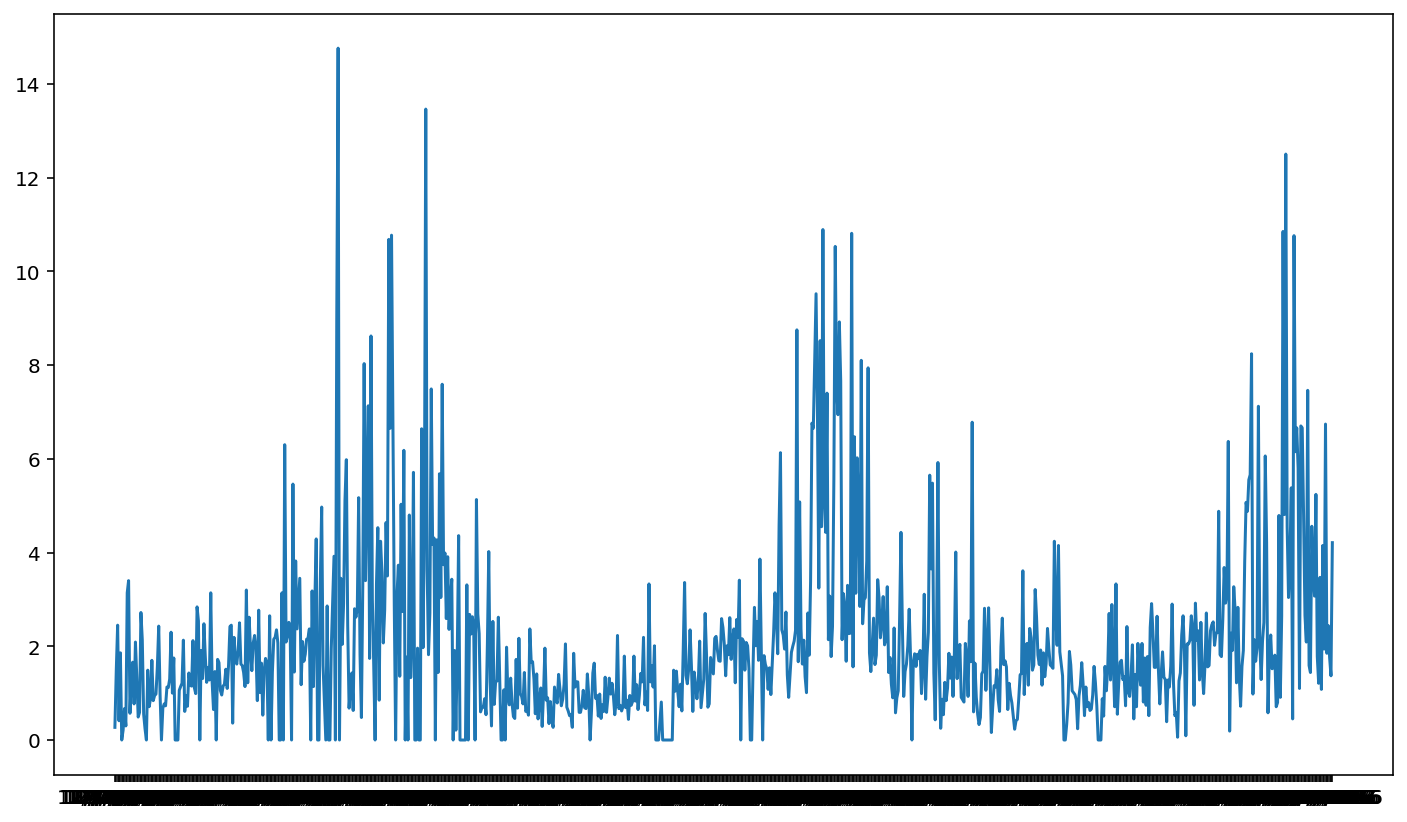

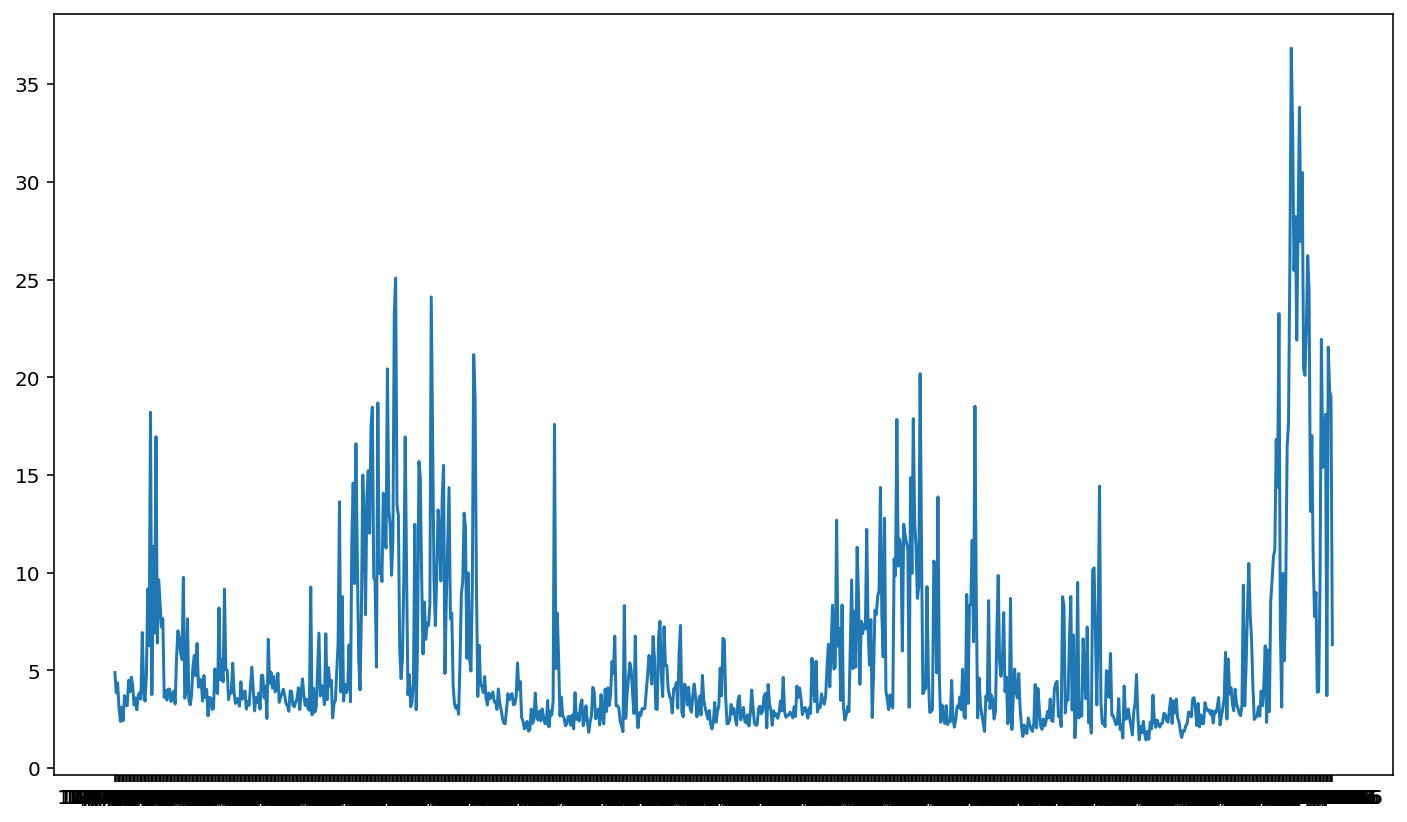

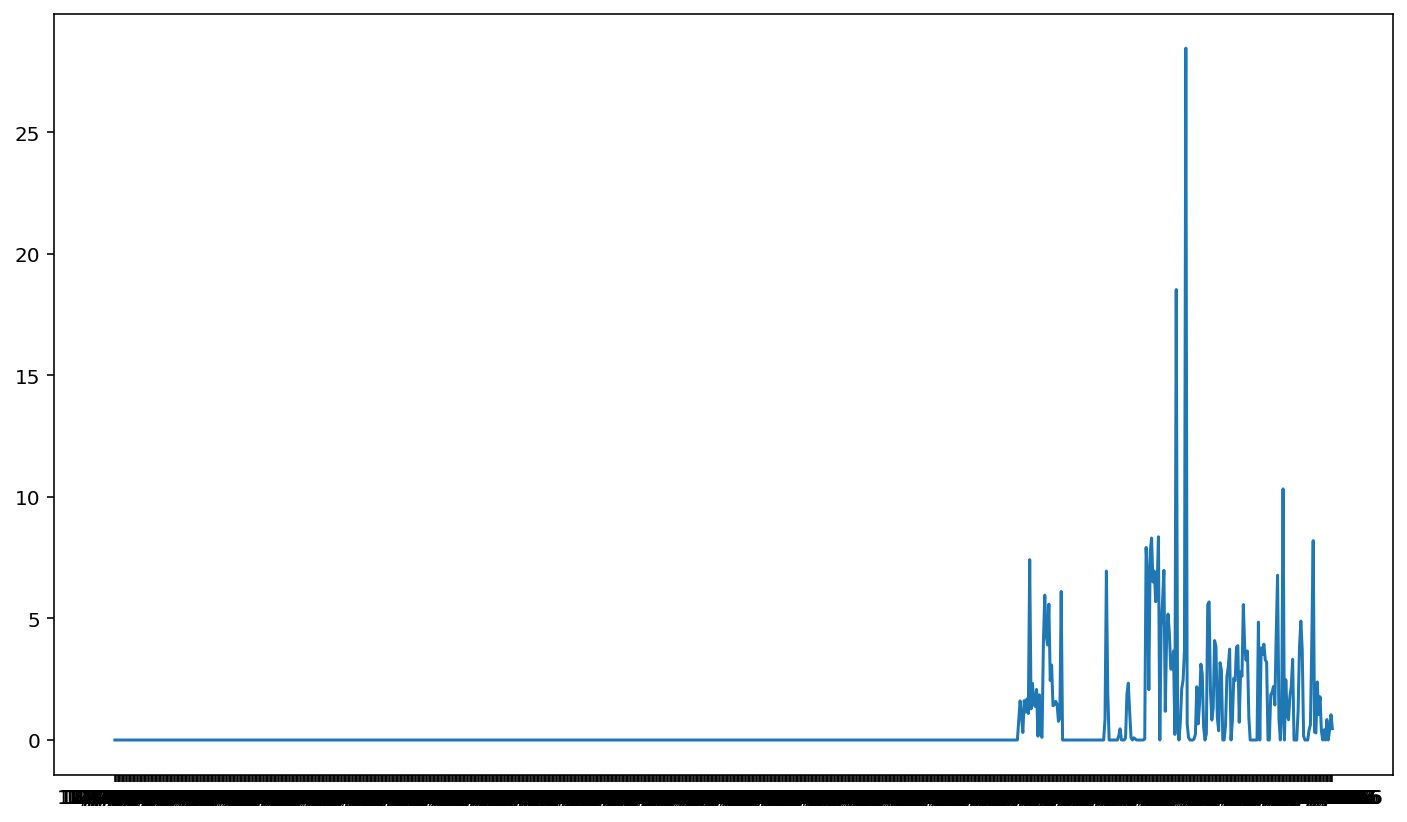

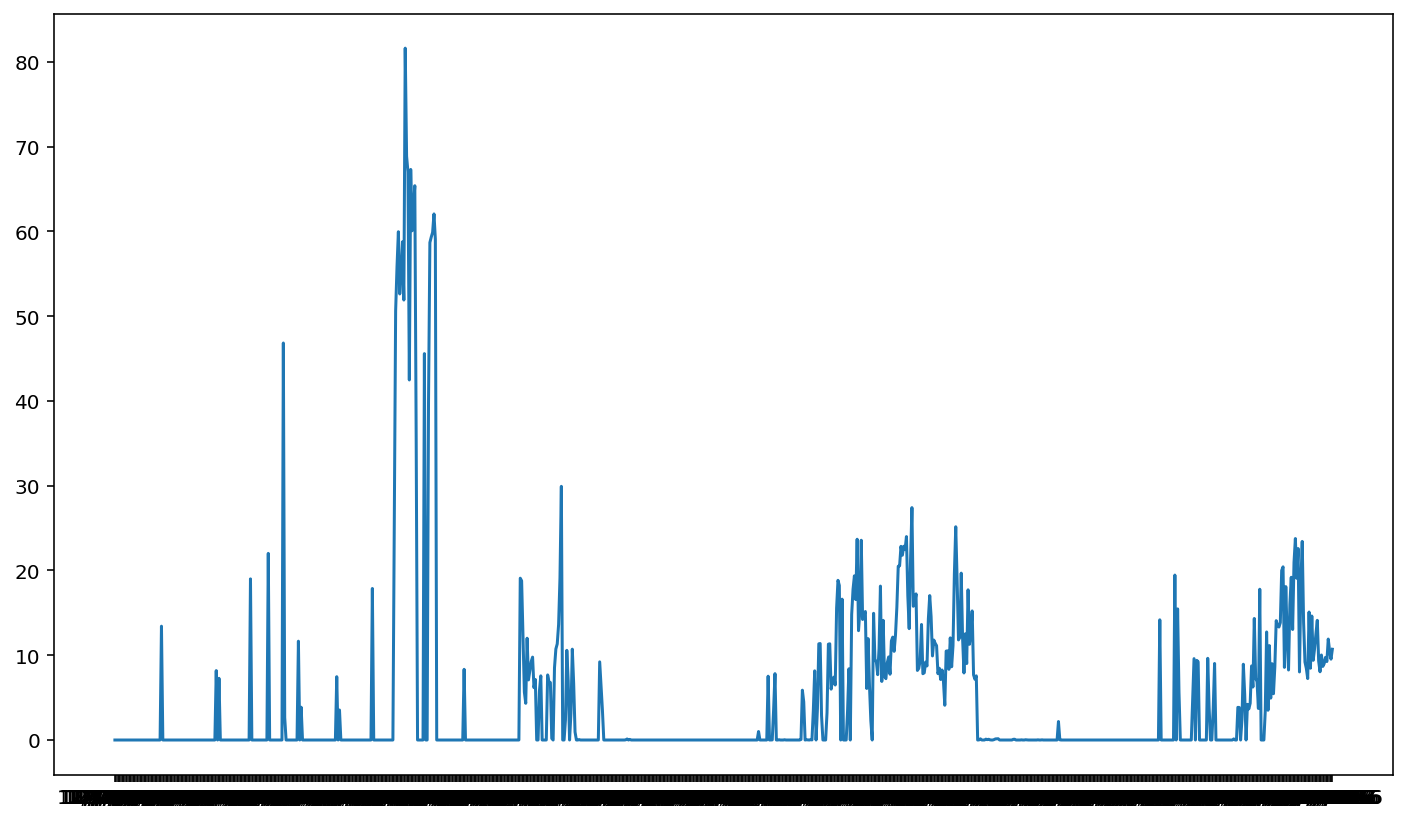

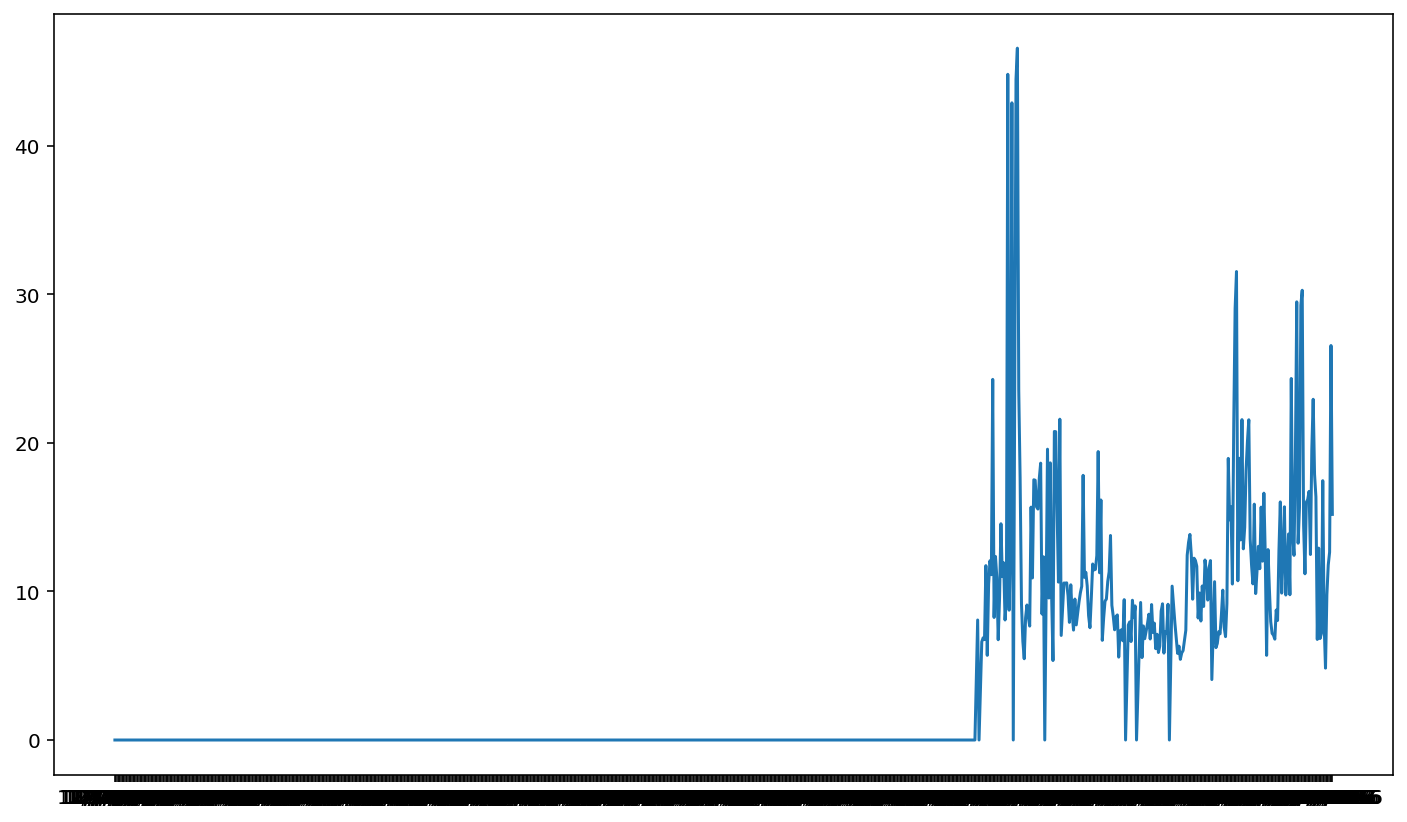

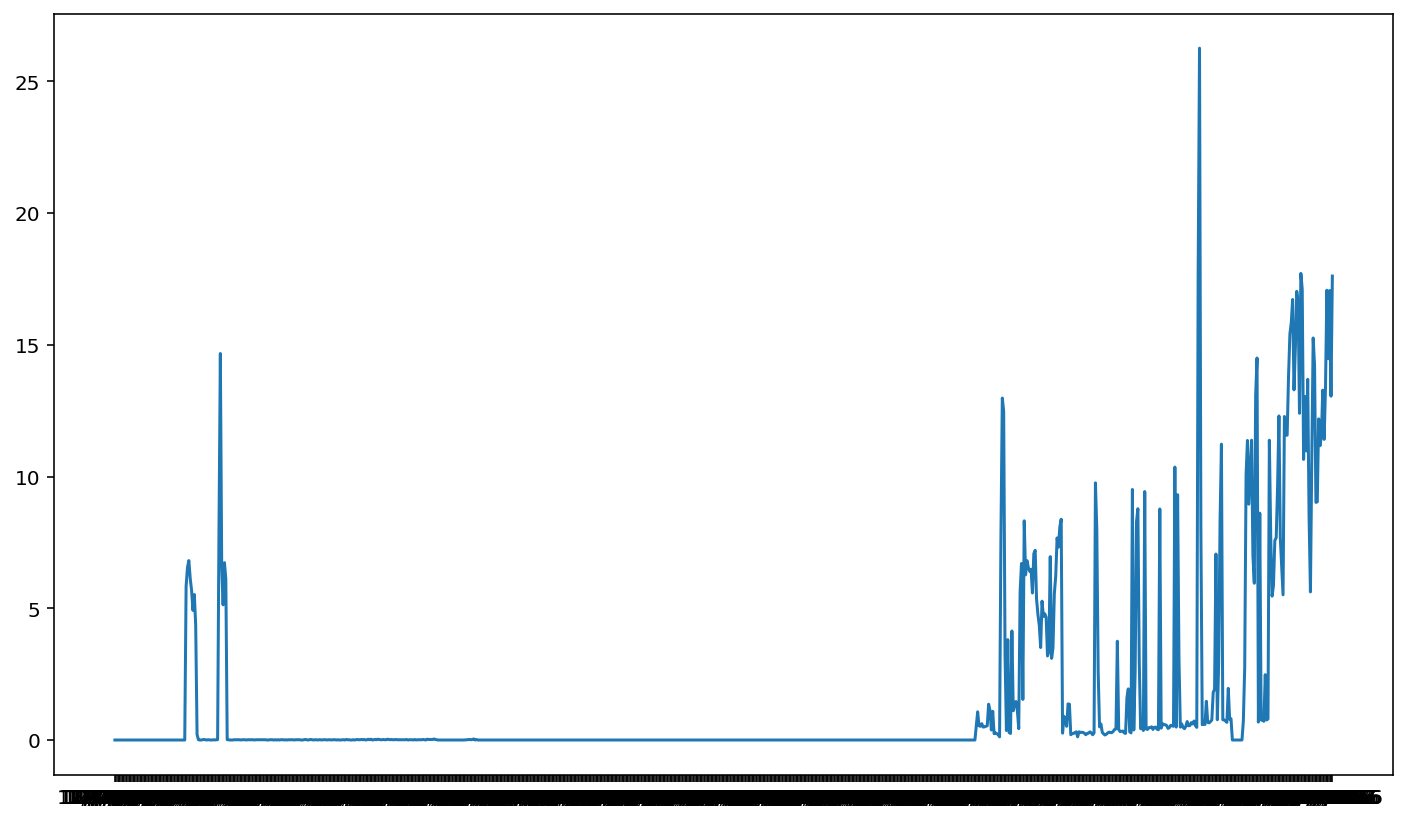

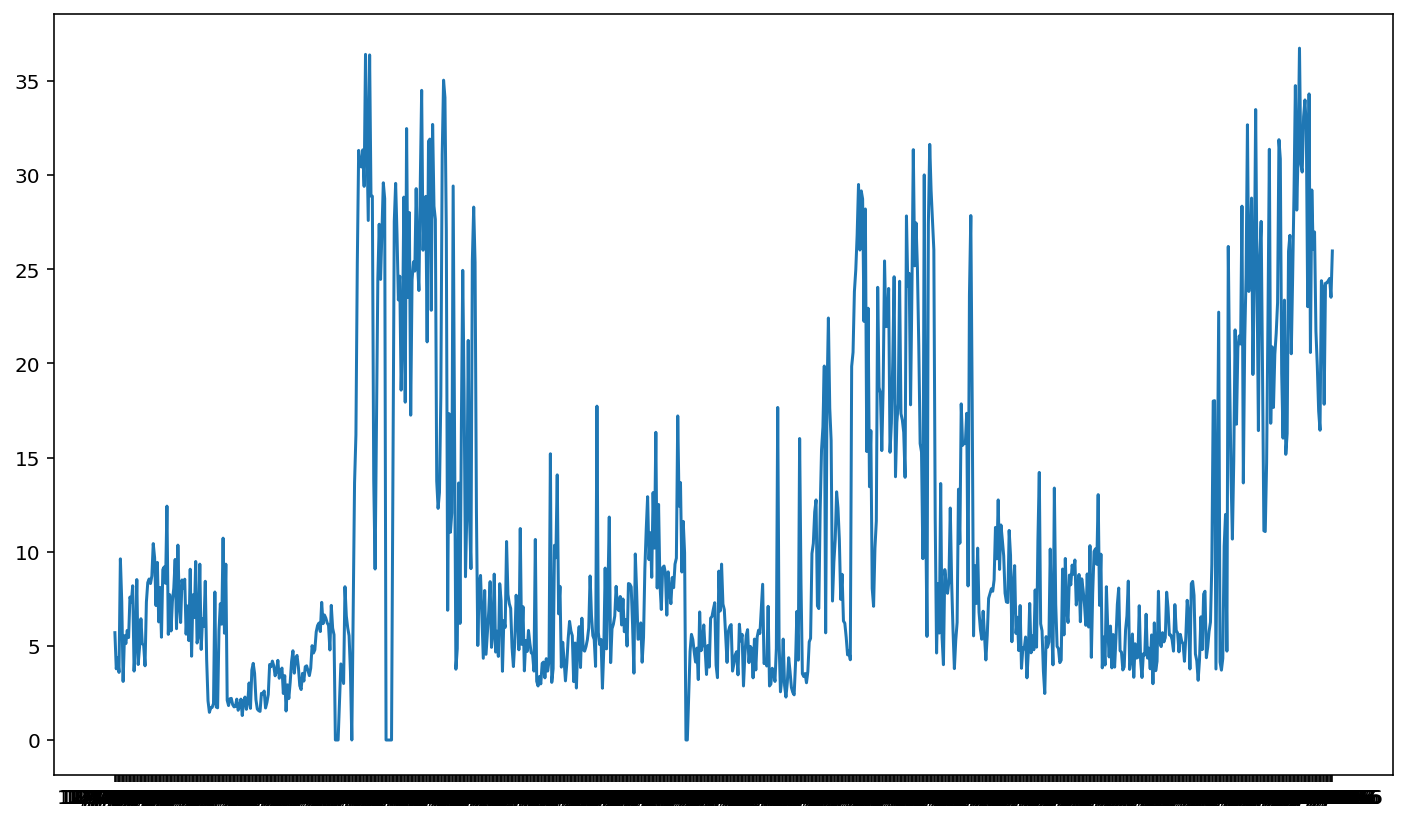

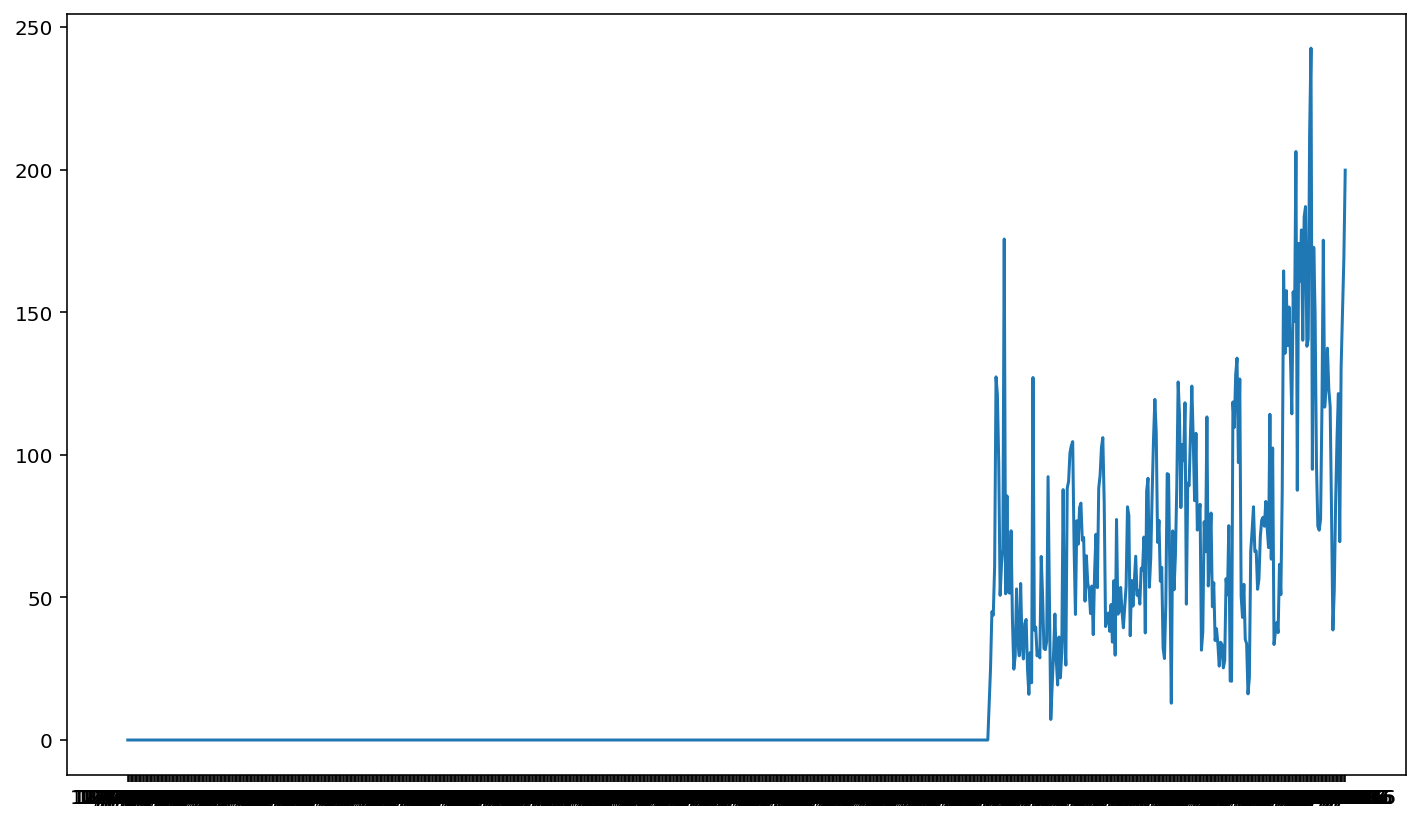

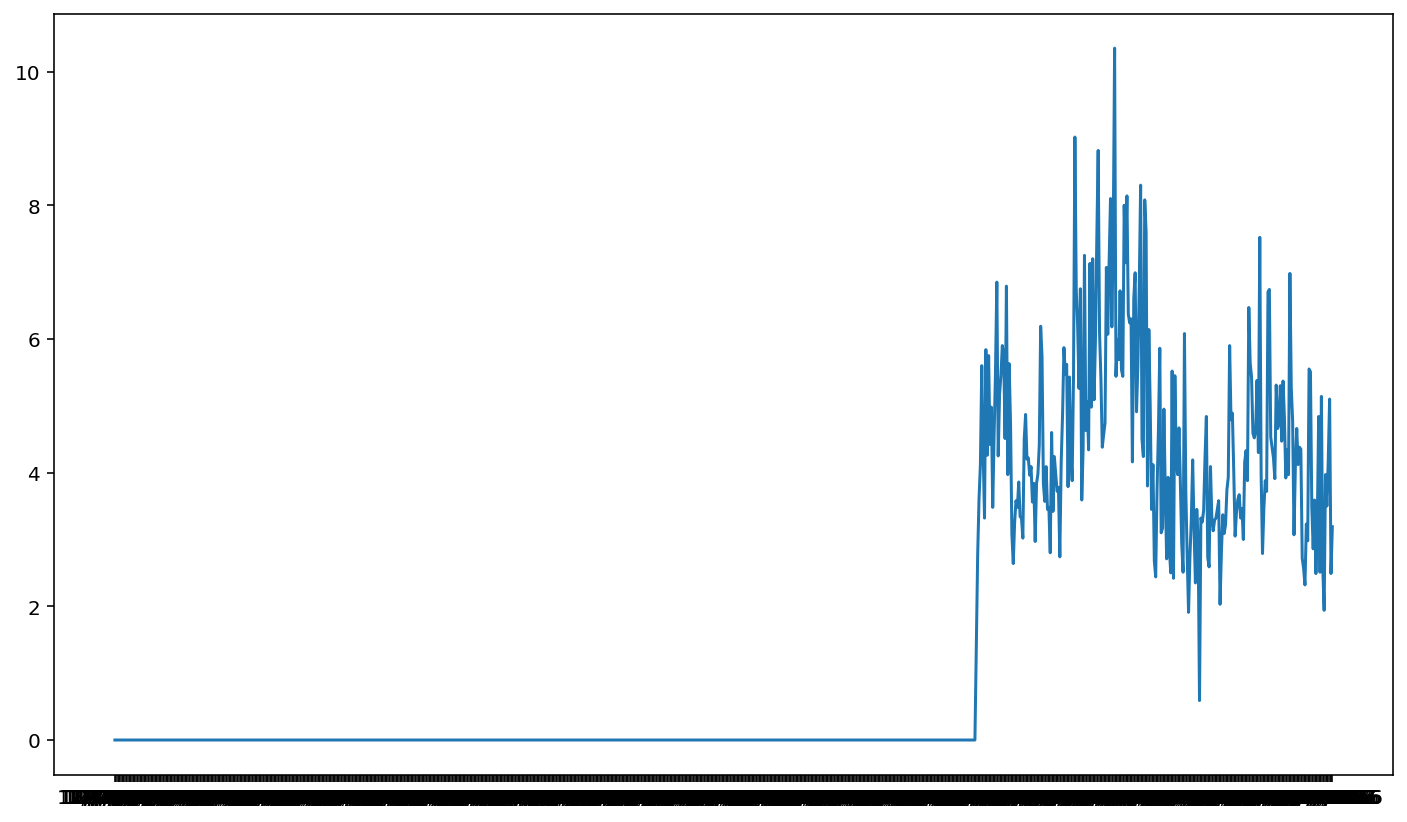

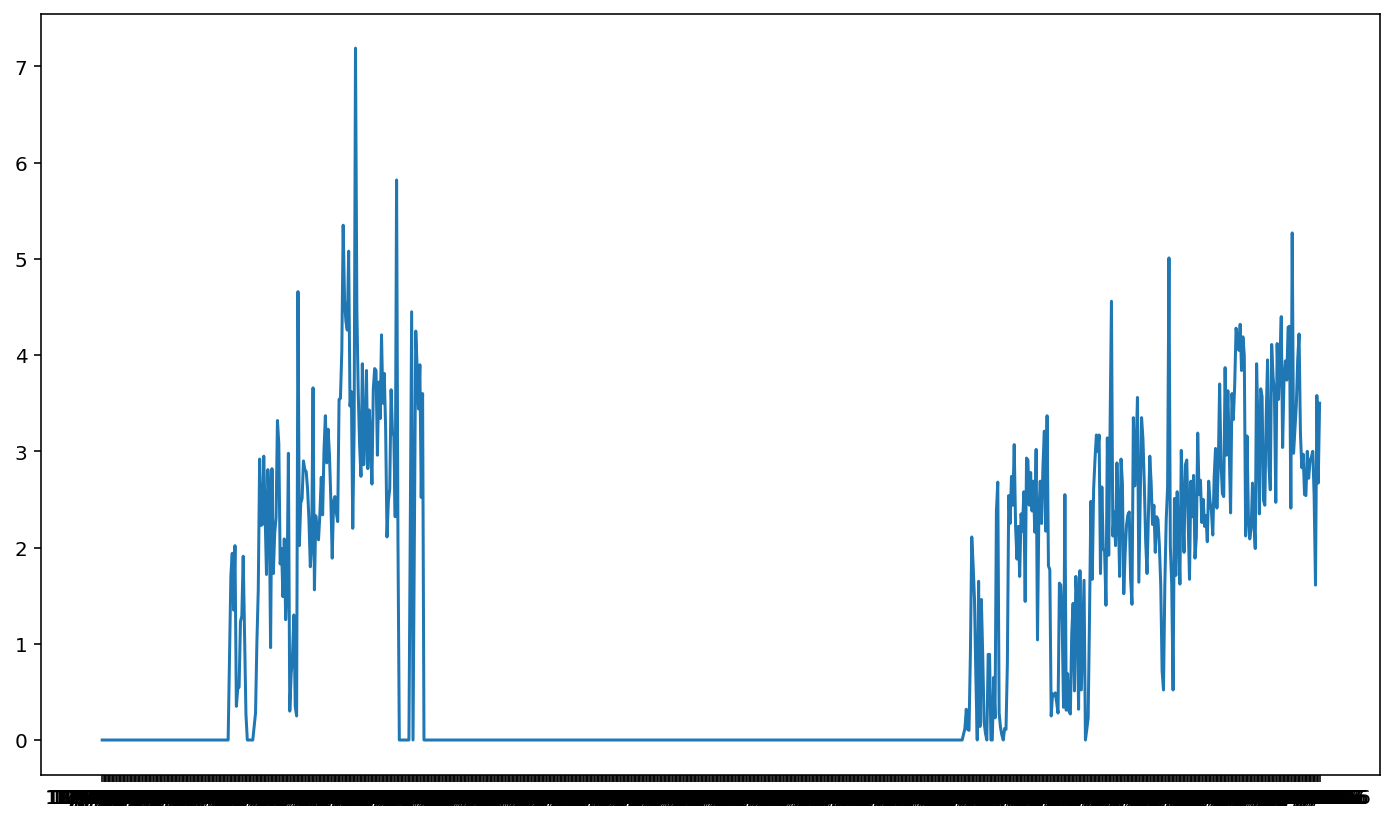

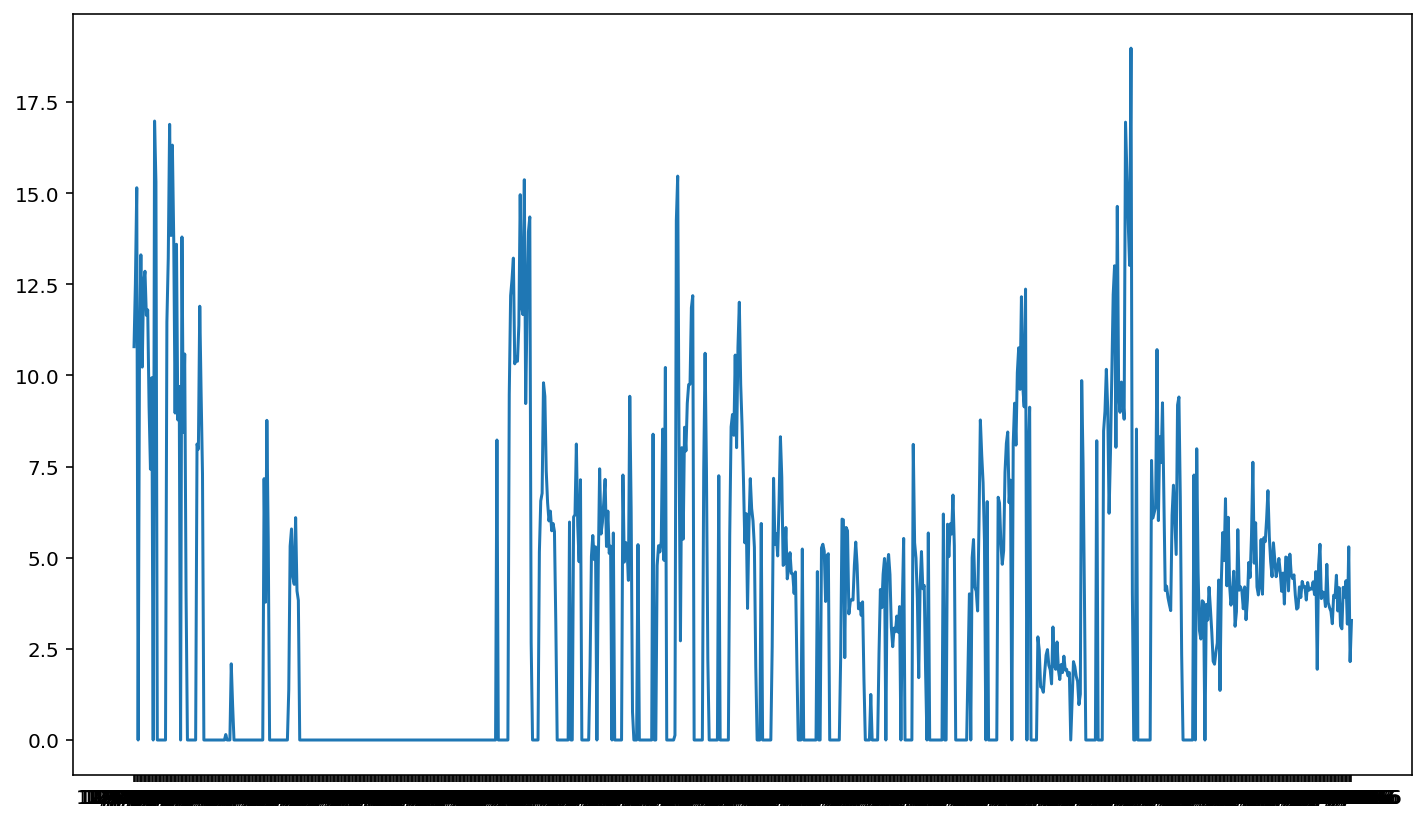

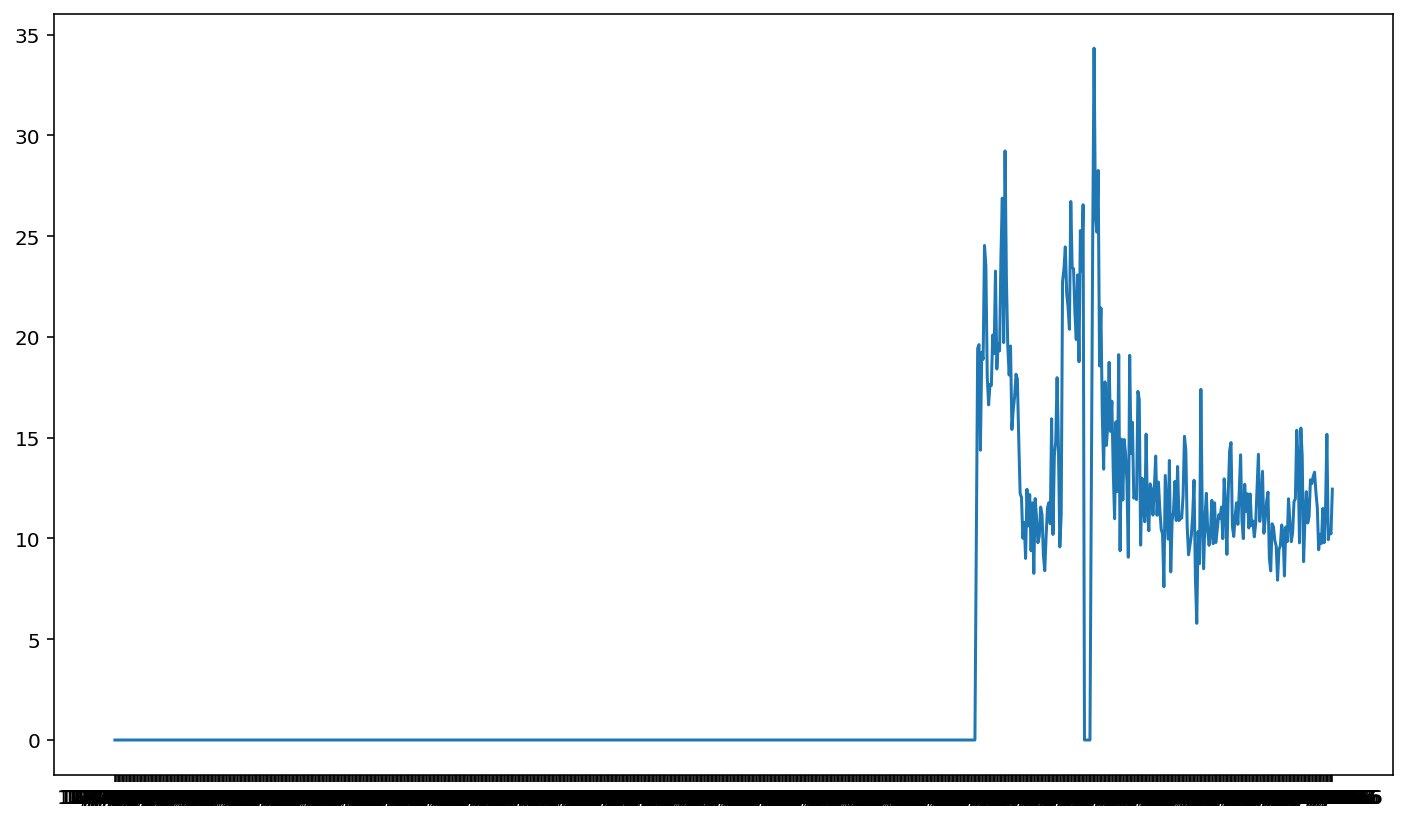

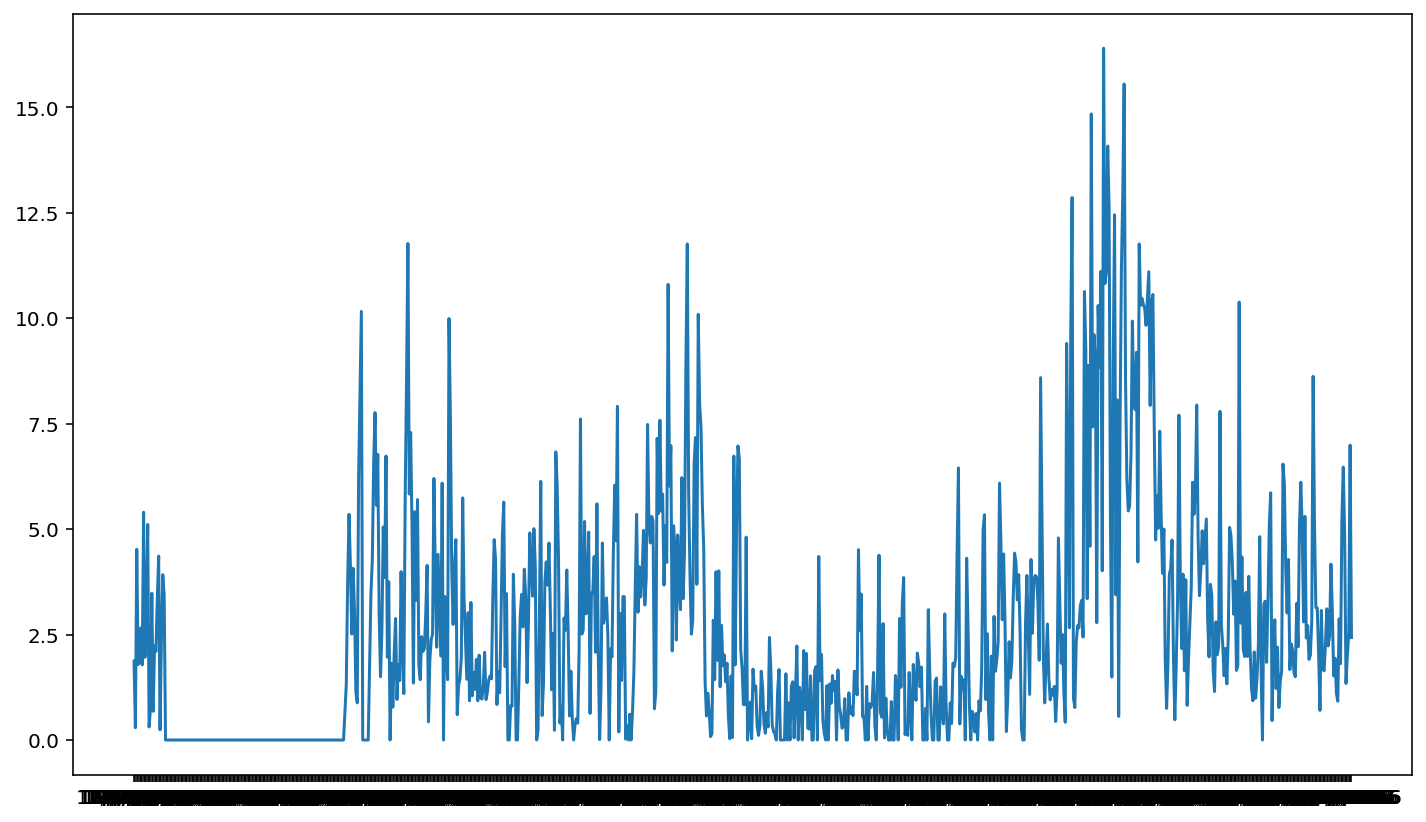

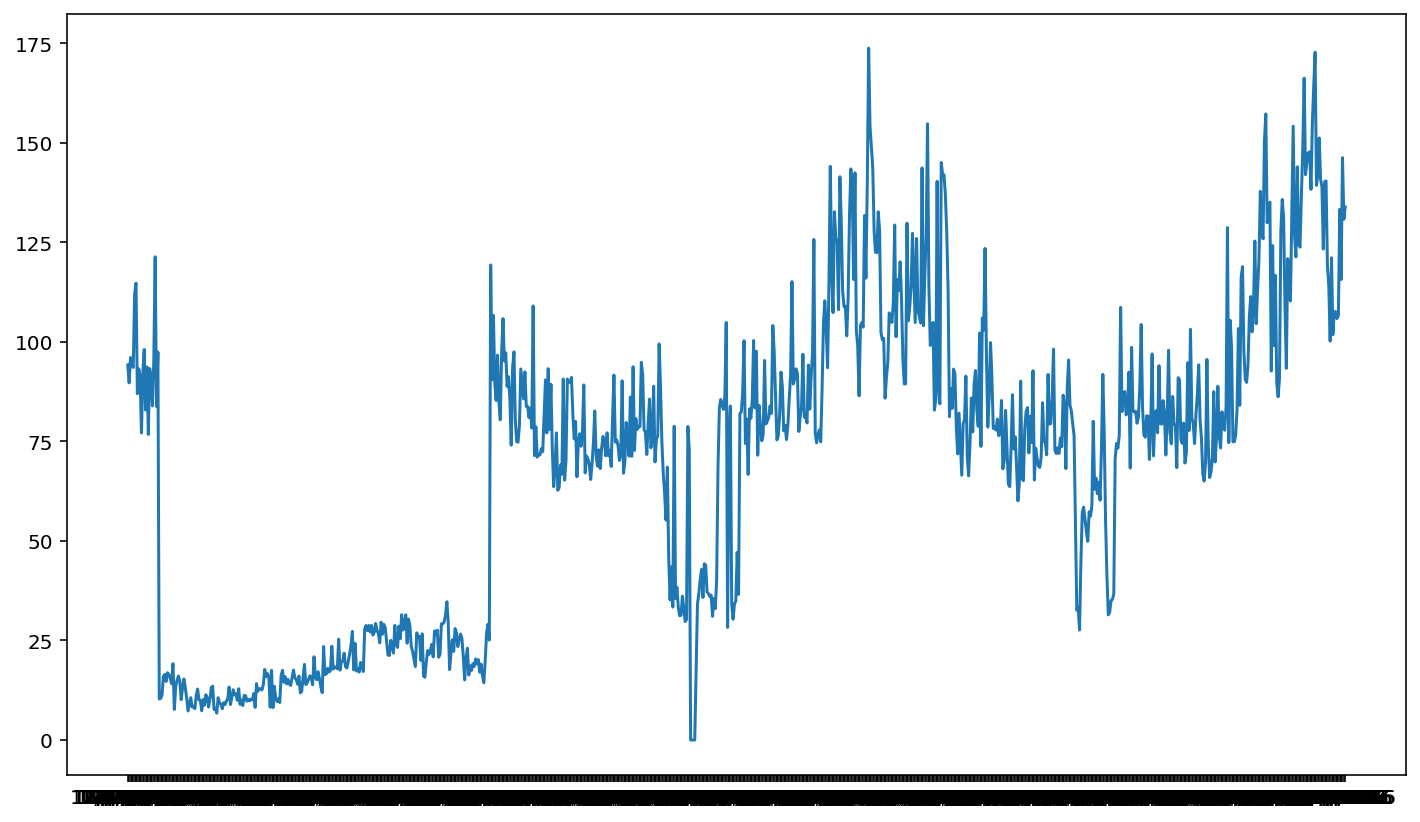

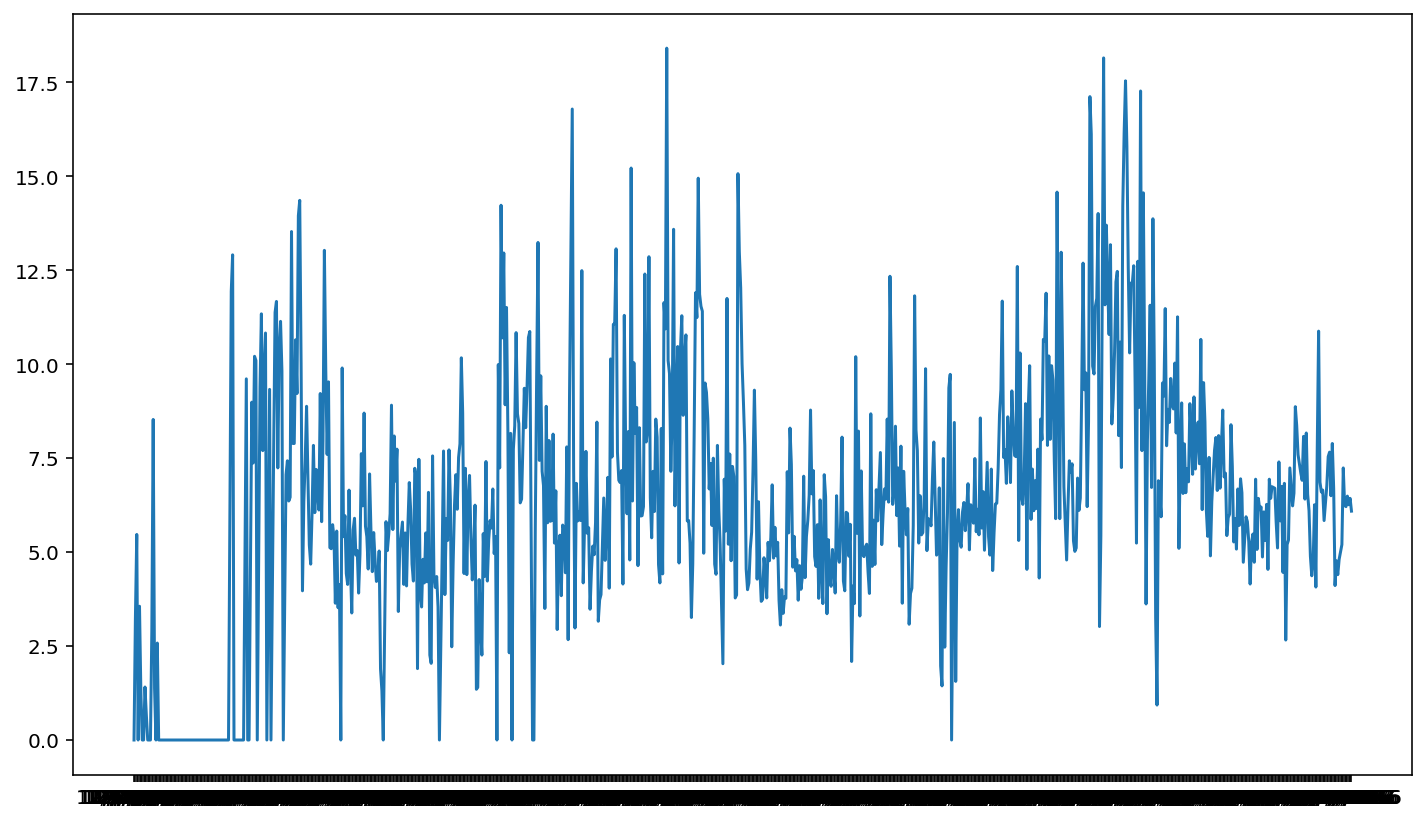

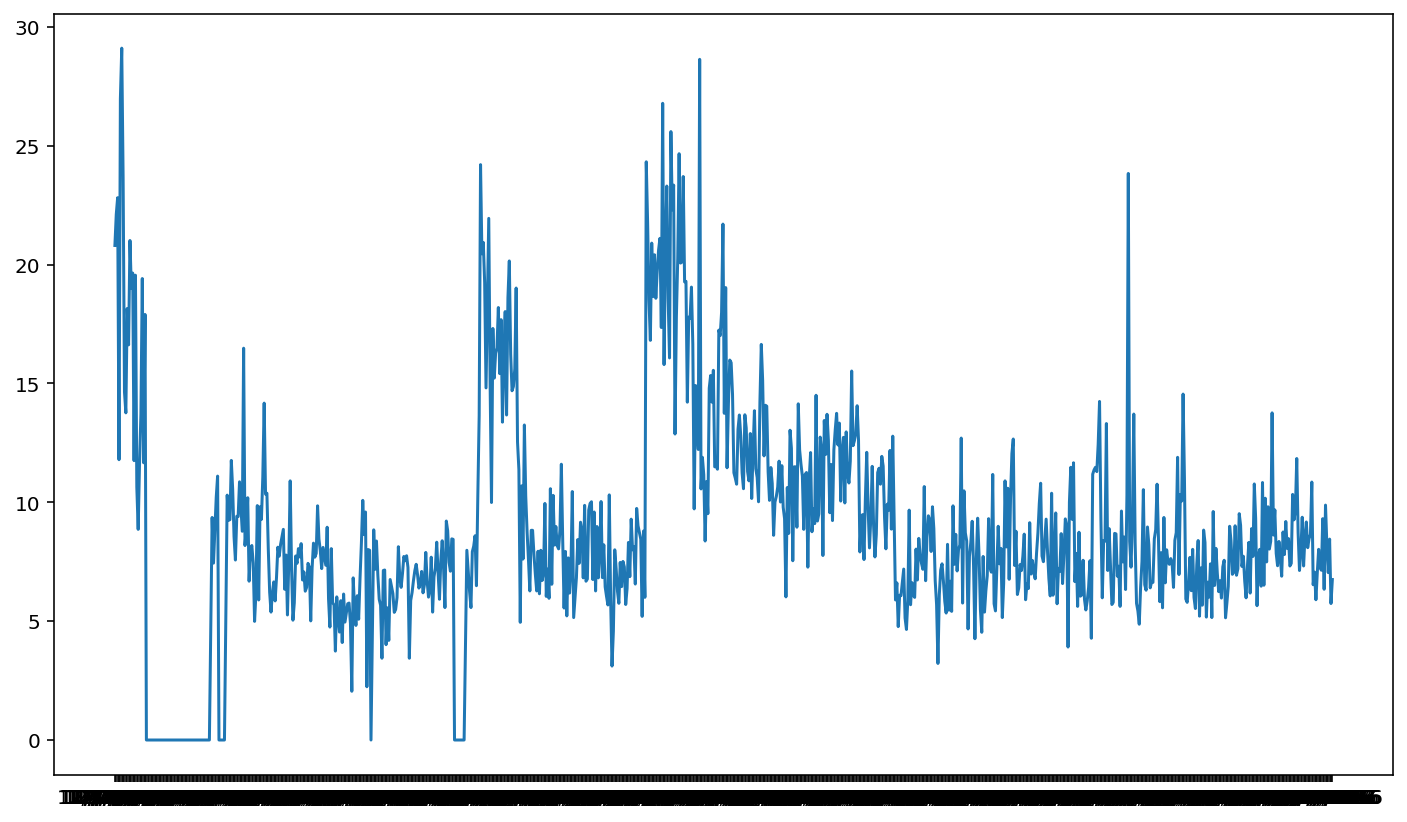

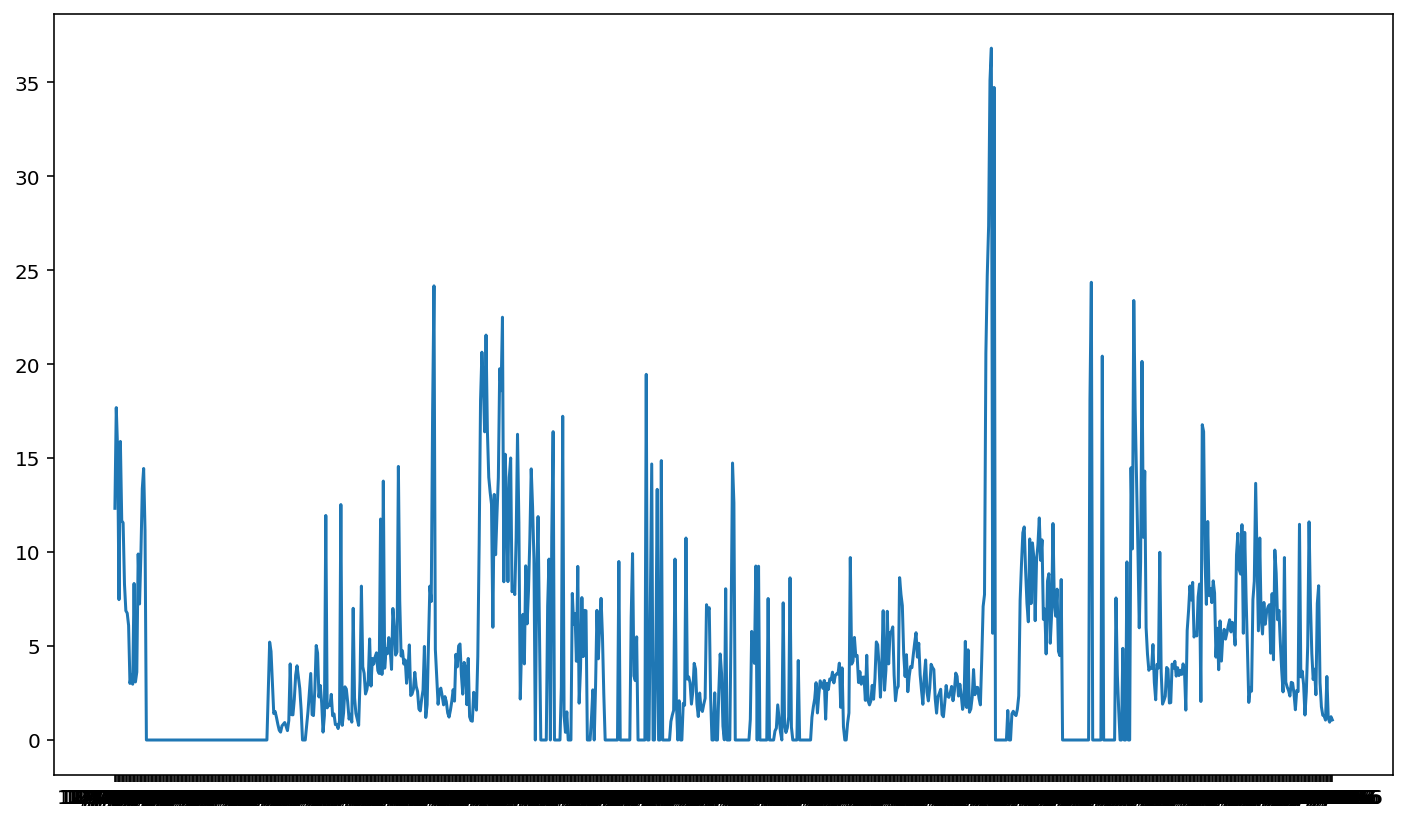

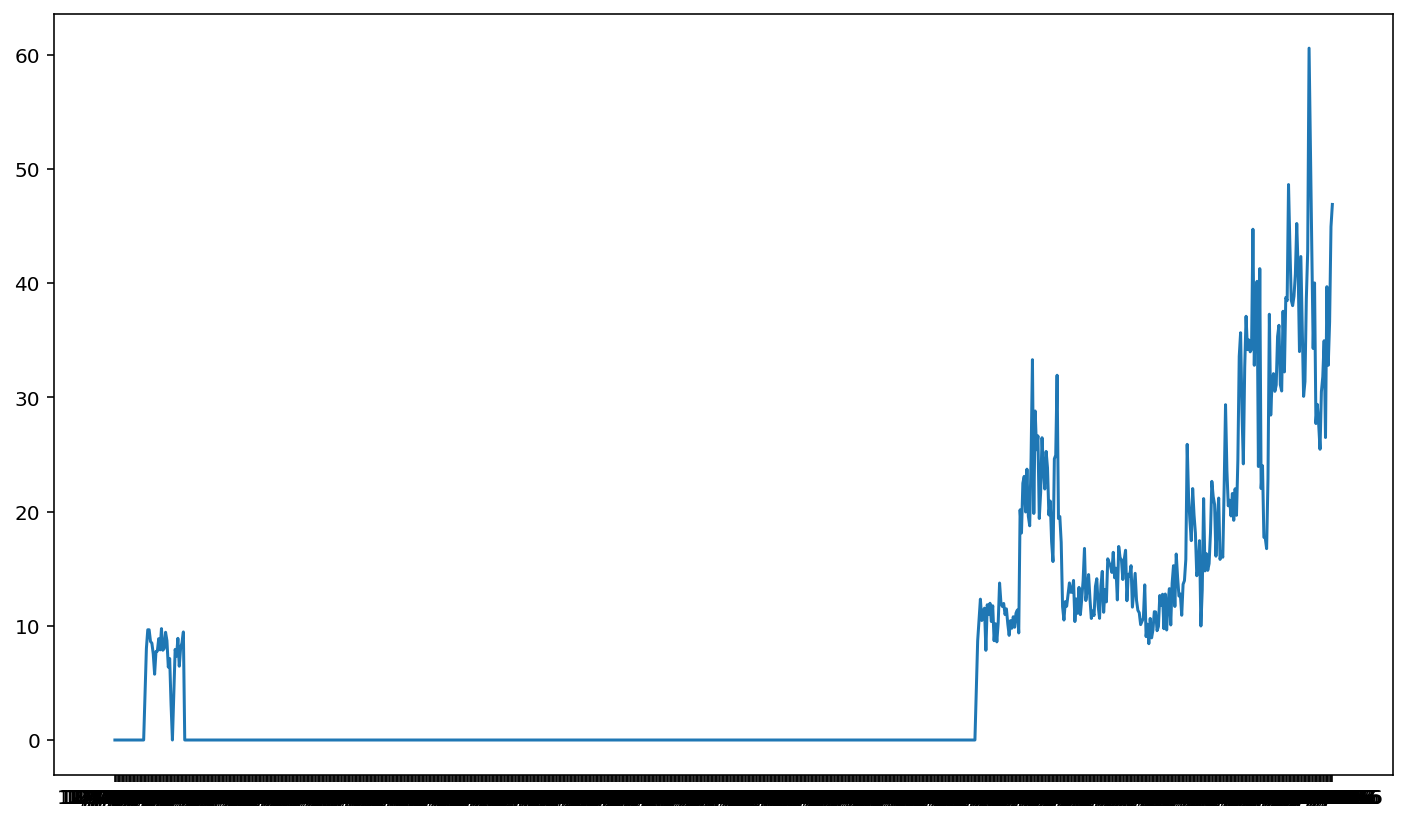

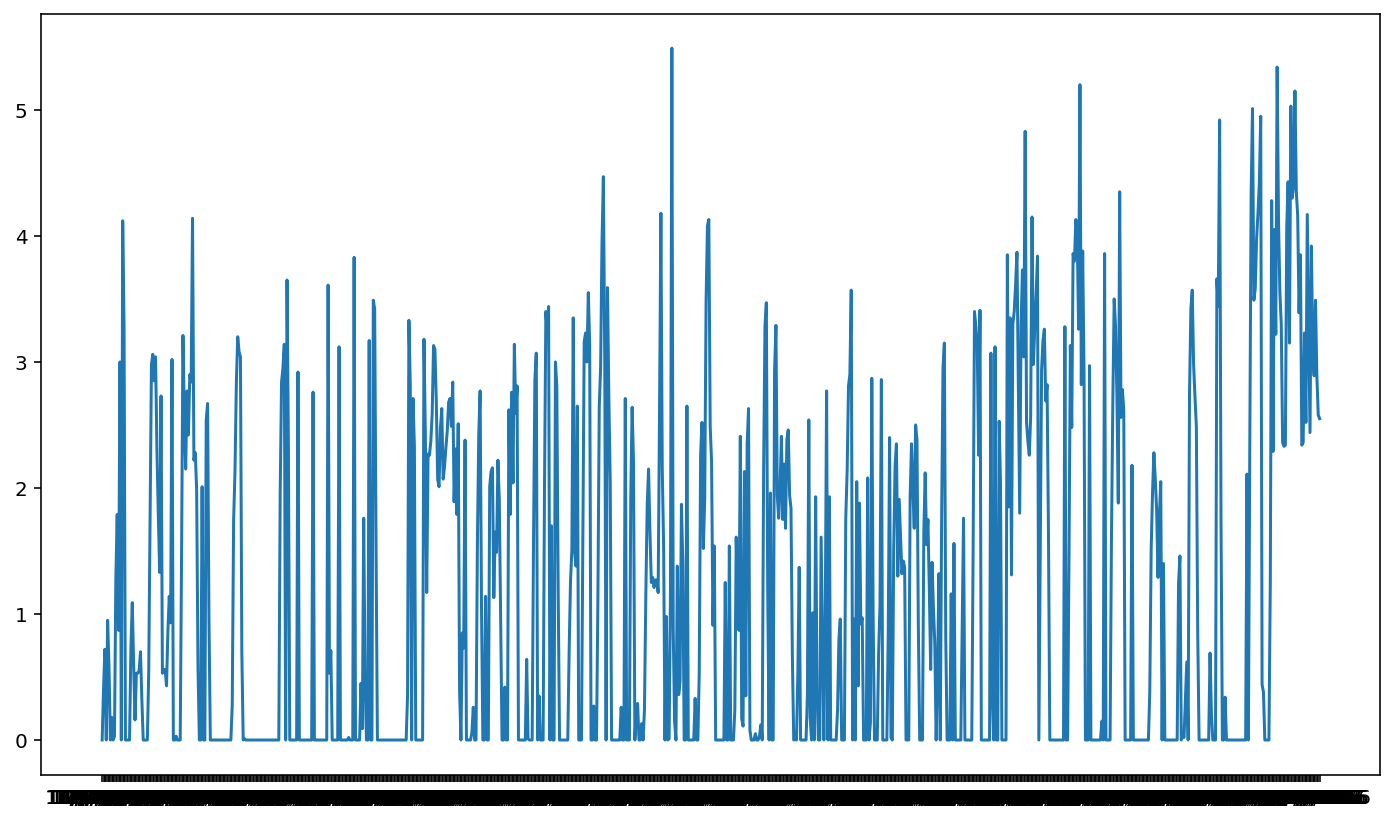

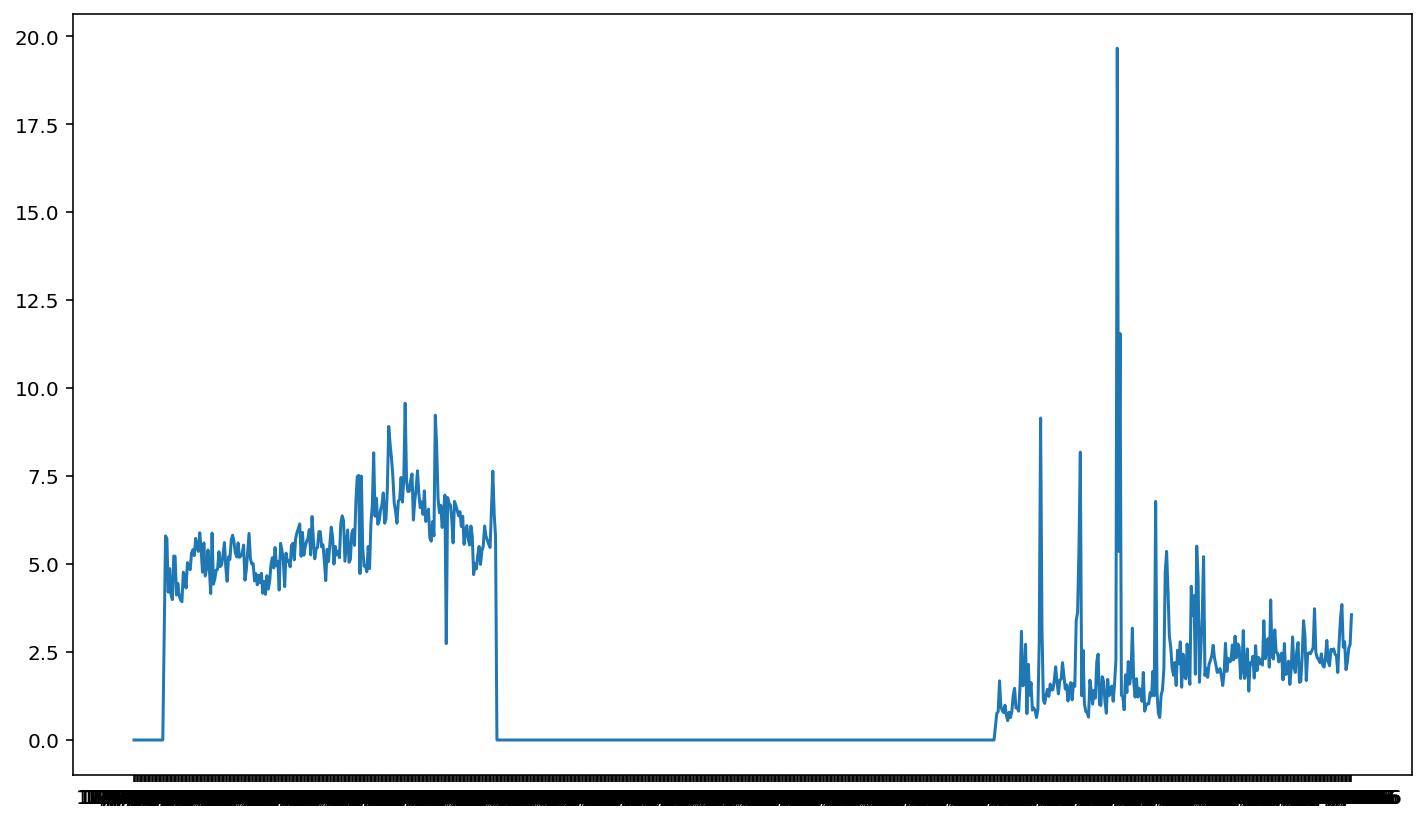

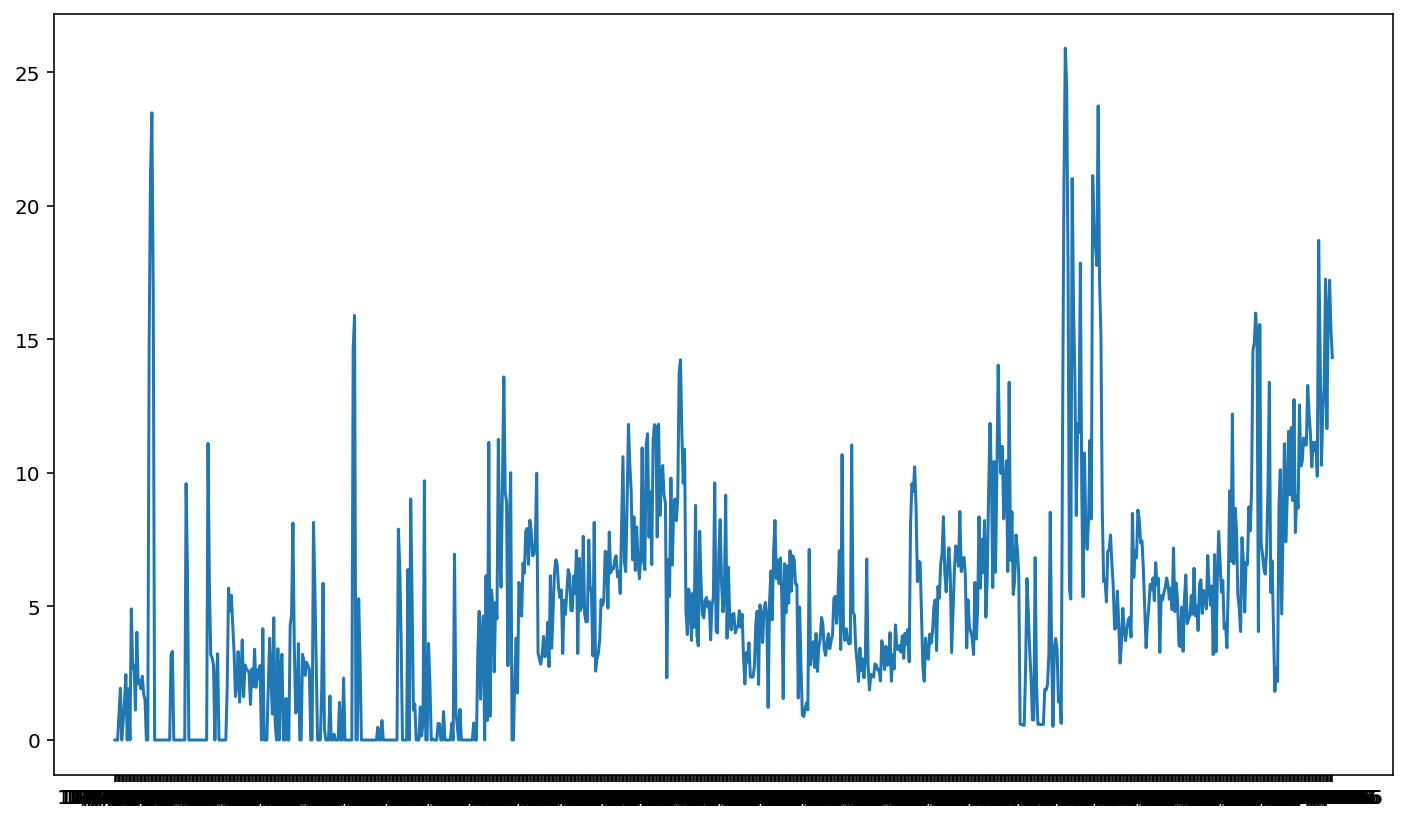

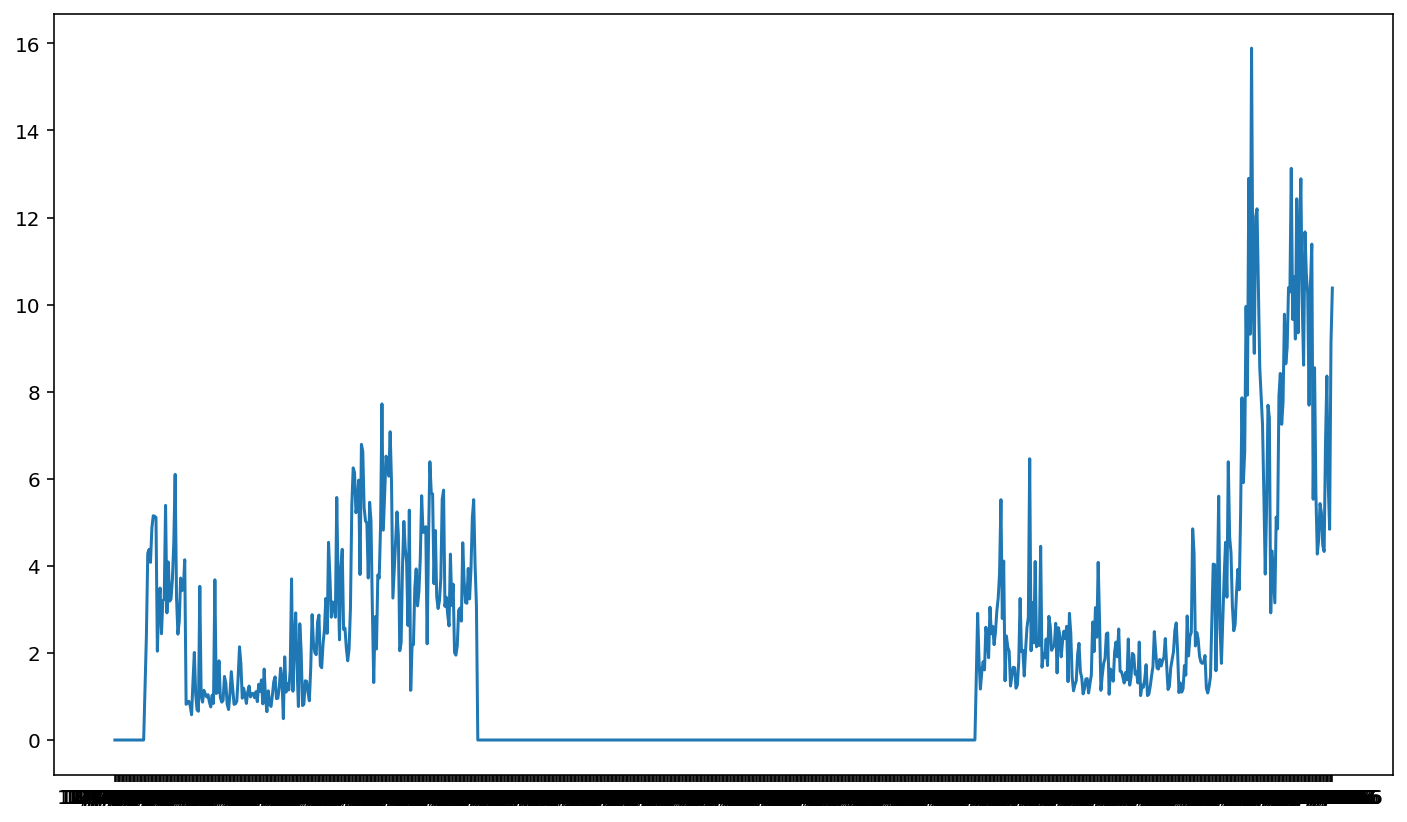

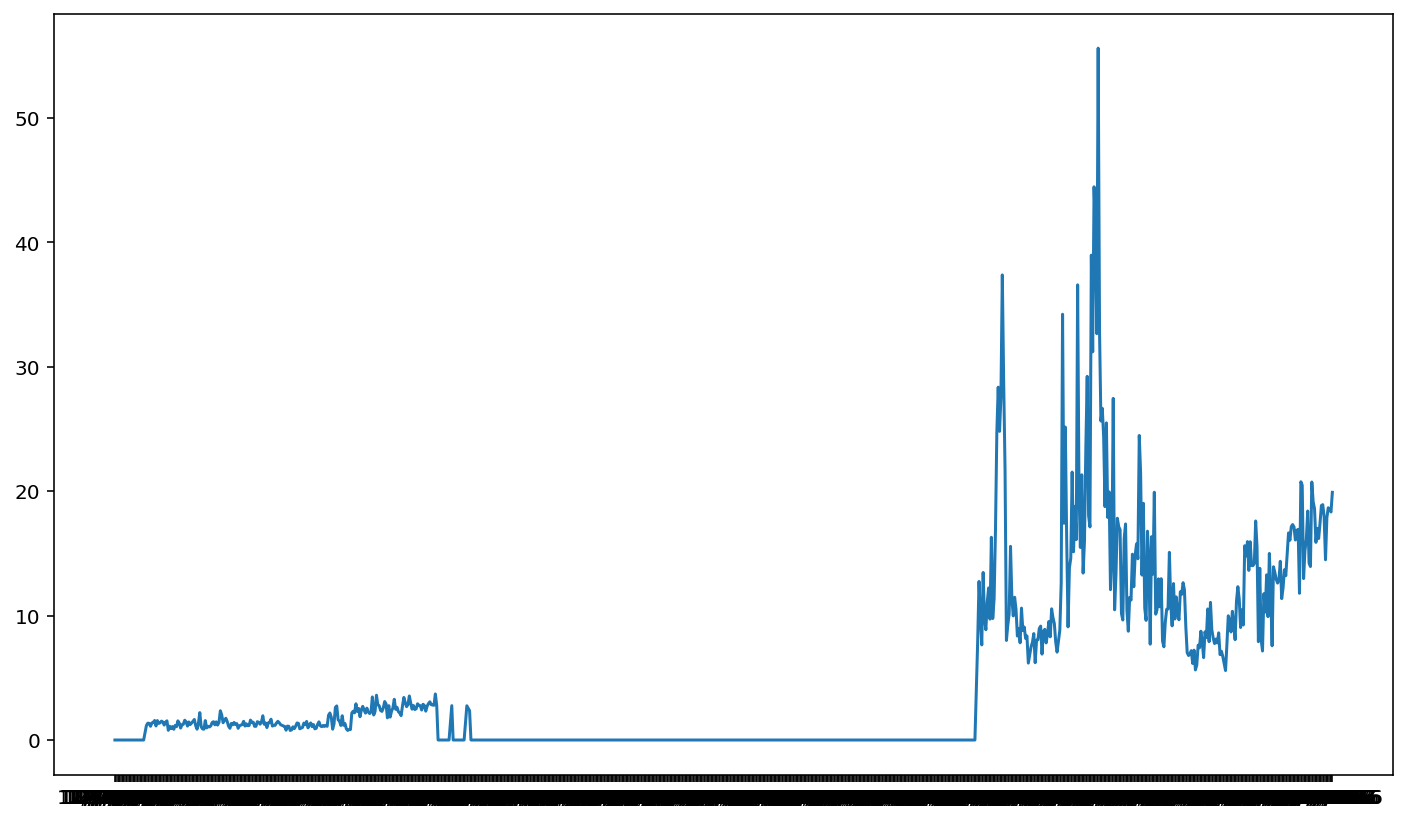

In [24]:

axes = plt.gca()
axes.set_ylim([0,250])
for i in range(250,300):
    plt.plot(l1,df1.iloc[i][l1])
    plt.show()

In [0]:
len(lbx)

In [0]:
X=df1[lbx[500:]]
Y=df1["FLAG"]

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20)

In [0]:
sm=SM(random_state=42)
#X_tr,Y_tr=sm.fit_sample(X_train,Y_train)
X_tr,Y_tr=sm.fit_sample(X_train,Y_train)

In [0]:
model=ET(n_estimators=10)
model.fit(X_tr,Y_tr)

In [0]:
model.score(X_test,Y_test)

In [0]:
l1=model.predict(X_test)
f1_score(Y_test,l1)